In [1]:
import random
randchoice = random.SystemRandom()
from fuzzywuzzy import fuzz
import time

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_curve, auc
import matplotlib

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('CES19.csv')
df.shape

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (25,27,28,30,31,33,34,39,179,181,188,192,193,199,210,227,234,236,237,239,240,243,276,299,302,311,314,315,316,327,362,417,418,421,422,423,424,425,431,464,465,468,538,541,578,579,582,583,584) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(37822, 621)

In [3]:
#Delete PES columns
newColumns = ['cps19_age','cps19_province', 'cps19_education', 'cps19_imp_iss', 'cps19_imp_iss_party', 'cps19_imp_iss_party_7_TEXT',
             'cps19_interest_gen_1', 'cps19_interest_elxn_1', 'cps19_party_rating_23', 'cps19_party_rating_24', 'cps19_party_rating_25',
              'cps19_party_rating_26', 'cps19_party_rating_27', 'cps19_party_rating_28', 'cps19_lead_rating_23', 'cps19_lead_rating_24',
              'cps19_lead_rating_25', 'cps19_lead_rating_26', 'cps19_lead_rating_27', 'cps19_lead_rating_28', 'cps19_cand_rating_23',
              'cps19_cand_rating_24', 'cps19_cand_rating_25', 'cps19_cand_rating_26', 'cps19_cand_rating_27', 'cps19_cand_rating_28',
             'cps19_lead_int_113', 'cps19_lead_int_114', 'cps19_lead_int_115', 'cps19_lead_int_116', 'cps19_lead_int_117',
              'cps19_lead_int_118', 'cps19_lead_int_119', 'cps19_lead_int_120', 'cps19_lead_strong_113', 'cps19_lead_strong_114',
              'cps19_lead_strong_115', 'cps19_lead_strong_116', 'cps19_lead_strong_117', 'cps19_lead_strong_118', 'cps19_lead_strong_119',
              'cps19_lead_strong_120', 'cps19_lead_trust_113', 'cps19_lead_trust_114', 'cps19_lead_trust_115',
              'cps19_lead_trust_116', 'cps19_lead_trust_117', 'cps19_lead_trust_118', 'cps19_lead_trust_119', 'cps19_lead_trust_120',
             'cps19_lead_cares_113', 'cps19_lead_cares_114', 'cps19_lead_cares_115', 'cps19_lead_cares_116',
              'cps19_lead_cares_117', 'cps19_lead_cares_118', 'cps19_lead_cares_119', 'cps19_lead_cares_120',
             'cps19_weight_general_all', 'cps19_weight_general_restricted', 'cps19_Q_Language',
              'cps19_v_likely', 'cps19_v_likely_pr', 'cps19_votechoice', 'cps19_votechoice_7_TEXT', 'cps19_votechoice_pr',
              'cps19_votechoice_pr_7_TEXT', 'cps19_vote_unlikely', 'cps19_vote_unlikely_7_TEXT', 'cps19_vote_unlike_pr',
              'cps19_vote_unlike_pr_7_TEXT', 'cps19_v_advance', 'cps19_v_advance_7_TEXT', 'cps19_vote_lean', 'cps19_vote_lean_7_TEXT',
              'cps19_vote_lean_pr', 'cps19_vote_lean_pr_7_TEXT', 'cps19_2nd_choice', 'cps19_2nd_choice_7_TEXT', 'cps19_2nd_choice_pr',
              'cps19_2nd_choice_pr_7_TEXT', 'cps19_not_vote_for_1', 'cps19_not_vote_for_2', 'cps19_not_vote_for_3', 'cps19_not_vote_for_4',
              'cps19_not_vote_for_5', 'cps19_not_vote_for_6', 'cps19_not_vote_for_7', 'cps19_not_vote_for_8', 'cps19_not_vote_for_9',
              'cps19_not_vote_for_7_TEXT', 'cps19_most_seats_1', 'cps19_most_seats_2', 'cps19_most_seats_3', 'cps19_most_seats_4', 'cps19_most_seats_5',
              'cps19_most_seats_6', 'cps19_win_local_1', 'cps19_win_local_2', 'cps19_win_local_3', 'cps19_win_local_4', 'cps19_win_local_5', 'cps19_win_local_6', 
             ]

In [4]:
data = df[newColumns]

In [5]:
data = data.drop(data[data['cps19_weight_general_restricted'].isna() == True].index)
data = data.drop(data[data['cps19_weight_general_all'].isna() == True].index)

In [6]:
data

,cps19_age,cps19_province,cps19_education,cps19_imp_iss,cps19_imp_iss_party,cps19_imp_iss_party_7_TEXT,cps19_interest_gen_1,cps19_interest_elxn_1,cps19_party_rating_23,cps19_party_rating_24,...,cps19_most_seats_3,cps19_most_seats_4,cps19_most_seats_5,cps19_most_seats_6,cps19_win_local_1,cps19_win_local_2,cps19_win_local_3,cps19_win_local_4,cps19_win_local_5,cps19_win_local_6
0,30,Quebec,Master's degree,environnement,Green Party,NaN,9.0,9.0,52.0,0.0,...,46.0,0.0,50.0,0.0,NaN,NaN,57.0,NaN,NaN,NaN
1,21,Quebec,Master's degree,environnement,Green Party,NaN,6.0,6.0,51.0,0.0,...,57.0,NaN,55.0,NaN,NaN,NaN,70.0,NaN,NaN,NaN
2,19,Ontario,Some university,NaN,NaN,NaN,8.0,8.0,52.0,49.0,...,62.0,19.0,32.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN
3,21,Ontario,Some university,strengthening foreign relations,Conservative Party,NaN,8.0,8.0,30.0,85.0,...,0.0,0.0,0.0,0.0,0.0,100.0,0.0,NaN,0.0,30.0
4,19,Ontario,Completed secondary/ high school,Taxation and Government Spending,Don't know/ Prefer not to answer,NaN,8.0,6.0,20.0,62.0,...,75.0,20.0,0.0,20.0,90.0,0.0,80.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37816,24,Quebec,"Completed technical, community college, CEGEP,...",Environnement,Green Party,NaN,2.0,6.0,60.0,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37817,58,Quebec,Bachelor's degree,Economy,Liberal Party,NaN,7.0,7.0,83.0,16.0,...,21.0,0.0,0.0,0.0,81.0,28.0,17.0,6.0,0.0,0.0
37819,50,Saskatchewan,"Some technical, community college, CEGEP, Coll...",Honor of the Treaties and clean environment,ndp,NaN,10.0,10.0,0.0,0.0,...,100.0,0.0,0.0,0.0,0.0,0.0,100.0,NaN,0.0,0.0
37820,36,Ontario,"Some technical, community college, CEGEP, Coll...",responsible use of taxpayer revenue,ndp,NaN,8.0,8.0,70.0,0.0,...,27.0,4.0,9.0,4.0,72.0,44.0,38.0,NaN,37.0,29.0


In [7]:
#Quel est votre interet pour la politique en general
data['cps19_interest_gen_1'].isna().sum()
mode = data['cps19_interest_gen_1'].mode()
data['cps19_interest_gen_1'].fillna(7, inplace=True)

In [8]:
#Quel est votre interet pour cette election federale
mode = data['cps19_interest_elxn_1'].mode()
data['cps19_interest_elxn_1'].fillna(8, inplace=True)

In [9]:
#Que pensez-vous des chefs de partis federaux
no_lead_party_list = data[(data['cps19_lead_rating_23'].isna() == True) &
                     (data['cps19_lead_rating_24'].isna() == True) &
                     (data['cps19_lead_rating_25'].isna() == True) &
                     (data['cps19_lead_rating_26'].isna() == True) &
                     (data['cps19_lead_rating_27'].isna() == True) &
                     (data['cps19_lead_rating_28'].isna() == True) ].index
data = data.drop(no_lead_party_list)

In [10]:
data['cps19_lead_rating_23'].fillna(50, inplace=True)
data['cps19_lead_rating_24'].fillna(36, inplace=True)
data['cps19_lead_rating_25'].fillna(55, inplace=True)
data['cps19_lead_rating_26'].fillna(21, inplace=True)
data['cps19_lead_rating_27'].fillna(51, inplace=True)
data['cps19_lead_rating_28'].fillna(20, inplace=True)

In [11]:
#Que pensez-vous des partis federaux
no_party_list = data[(data['cps19_party_rating_23'].isna() == True) &
                 (data['cps19_party_rating_24'].isna() == True) &
                 (data['cps19_party_rating_25'].isna() == True) &
                 (data['cps19_party_rating_26'].isna() == True) &
                 (data['cps19_party_rating_27'].isna() == True) &
                 (data['cps19_party_rating_28'].isna() == True) ].index
data = data.drop(no_party_list)

In [12]:
data['cps19_party_rating_23'].fillna(55, inplace=True)
data['cps19_party_rating_24'].fillna(41, inplace=True)
data['cps19_party_rating_25'].fillna(55, inplace=True)
data['cps19_party_rating_26'].fillna(12, inplace=True)
data['cps19_party_rating_27'].fillna(51, inplace=True)
data['cps19_party_rating_28'].fillna(19, inplace=True)
#data[data['cps19_votechoice']=='Liberal Party']['cps19_lead_rating_23'].mean()

In [13]:
#Que pensez-vous des candidat(e)s dans votre circonscription locale
no_cand_list = data[(data['cps19_cand_rating_23'].isna() == True) &
                 (data['cps19_cand_rating_24'].isna() == True) &
                 (data['cps19_cand_rating_25'].isna() == True) &
                 (data['cps19_cand_rating_26'].isna() == True) &
                 (data['cps19_cand_rating_27'].isna() == True) &
                 (data['cps19_cand_rating_28'].isna() == True) ].index
data = data.drop(no_cand_list)

In [14]:
print(data['cps19_cand_rating_26'].isna().sum())
print(len(data['cps19_cand_rating_26'].isna()))
print(data.shape[0])

22785
28227
28227


In [15]:
data['cps19_cand_rating_23'].fillna(51, inplace=True)
data['cps19_cand_rating_24'].fillna(48, inplace=True)
data['cps19_cand_rating_25'].fillna(50, inplace=True)
data['cps19_cand_rating_27'].fillna(41, inplace=True)
data['cps19_cand_rating_28'].fillna(17, inplace=True)

In [16]:
listC = list(data['cps19_cand_rating_26'].unique())
listC.pop(1)

nan

In [17]:
listR = list(data[data['cps19_cand_rating_26'].isna() == True].index)

In [18]:
quebec = listC
print(quebec)
for i in listR:
    data['cps19_cand_rating_26'][i] = randchoice.choice(quebec)

[0.0, 7.0, 53.0, 60.0, 43.0, 69.0, 79.0, 59.0, 51.0, 100.0, 2.0, 12.0, 19.0, 45.0, 52.0, 31.0, 17.0, 68.0, 81.0, 66.0, 14.0, 39.0, 56.0, 4.0, 76.0, 93.0, 30.0, 86.0, 34.0, 71.0, 42.0, 41.0, 50.0, 1.0, 5.0, 47.0, 35.0, 65.0, 11.0, 32.0, 57.0, 61.0, 64.0, 6.0, 58.0, 78.0, 46.0, 92.0, 70.0, 72.0, 82.0, 73.0, 67.0, 80.0, 44.0, 83.0, 33.0, 3.0, 84.0, 8.0, 9.0, 10.0, 27.0, 29.0, 22.0, 40.0, 90.0, 49.0, 97.0, 37.0, 62.0, 75.0, 74.0, 85.0, 95.0, 99.0, 20.0, 13.0, 36.0, 54.0, 63.0, 16.0, 21.0, 25.0, 18.0, 26.0, 15.0, 91.0, 87.0, 28.0, 48.0, 77.0, 24.0, 98.0, 96.0, 55.0, 38.0, 89.0, 23.0, 88.0, 94.0]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [19]:
data['cps19_cand_rating_26'].isna().sum()

0

<AxesSubplot:xlabel='cps19_cand_rating_26', ylabel='cps19_province'>

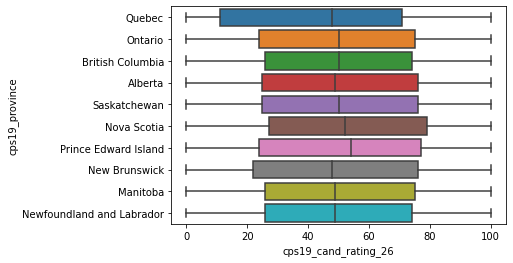

In [20]:
sb.boxplot(x = data['cps19_cand_rating_26'], y = data['cps19_province'])

In [21]:
#Quel parti a le plus de chances de gagner le siege dans votre circonscription
no_win_list = data[(data['cps19_win_local_1'].isna() == True) &
                 (data['cps19_win_local_2'].isna() == True) &
                 (data['cps19_win_local_3'].isna() == True) &
                 (data['cps19_win_local_4'].isna() == True) &
                 (data['cps19_win_local_5'].isna() == True) &
                 (data['cps19_win_local_6'].isna() == True) ].index
data = data.drop(no_win_list)

In [22]:
data['cps19_win_local_1'].fillna(61, inplace=True)
data['cps19_win_local_2'].fillna(62, inplace=True)
data['cps19_win_local_3'].fillna(34, inplace=True)
data['cps19_win_local_5'].fillna(13, inplace=True)
data['cps19_win_local_6'].fillna(3, inplace=True)

In [23]:
listZ = list(data['cps19_win_local_4'].unique())
listZ.pop(0)
listR = list(data[data['cps19_win_local_4'].isna() == True].index)
quebec = listZ
for i in listR:
    data['cps19_win_local_4'][i] = randchoice.choice(quebec)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
data[['cps19_education','cps19_votechoice']]

,cps19_education,cps19_votechoice
0,Master's degree,Green Party
1,Master's degree,Don't know/ Prefer not to answer
3,Some university,Conservative Party
5,Some university,Liberal Party
6,Completed secondary/ high school,NaN
...,...,...
37811,"Completed technical, community college, CEGEP,...",Bloc Qu<e9>b<e9>cois
37815,Some university,Bloc Qu<e9>b<e9>cois
37817,Bachelor's degree,Liberal Party
37819,"Some technical, community college, CEGEP, Coll...",NaN


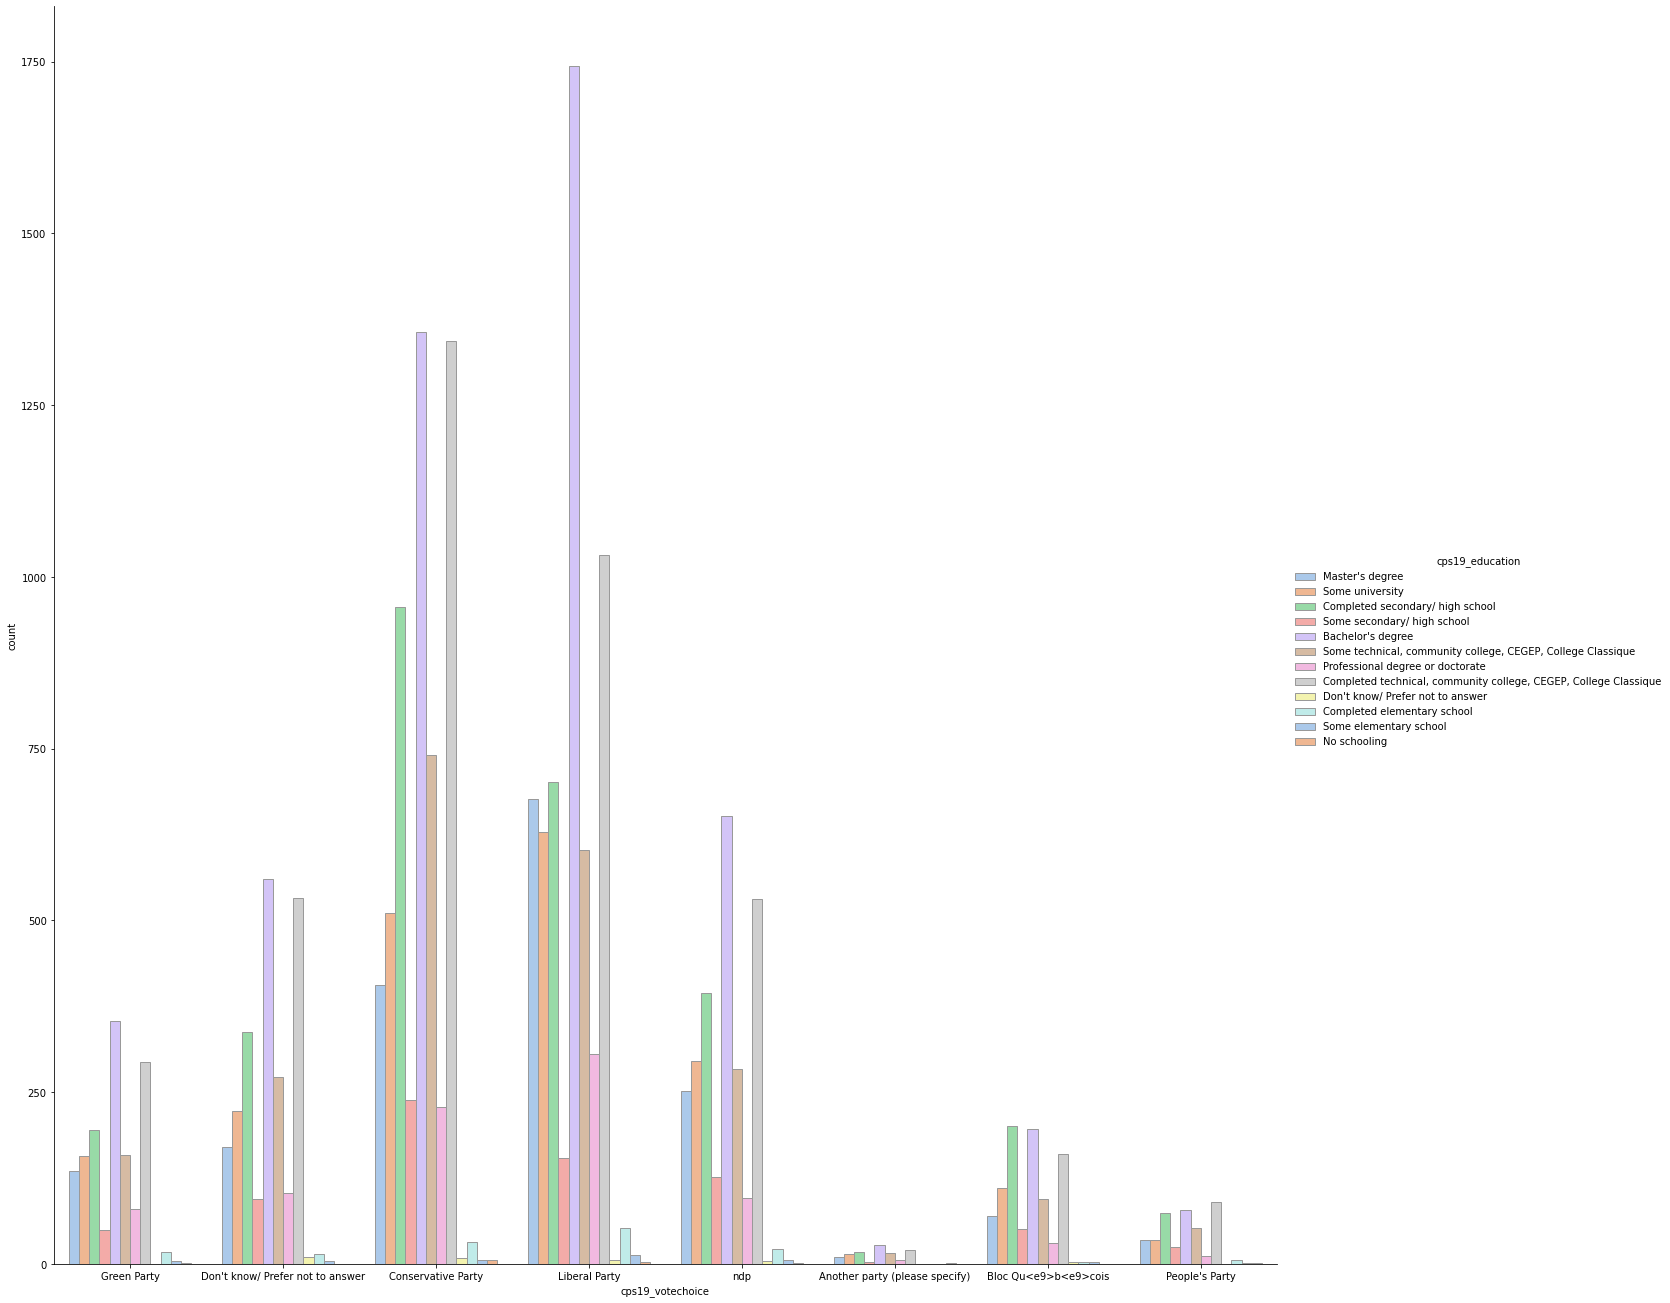

In [25]:
#sb.displot(data['cps19_education'], data['cps19_votechoice'])
sb.catplot(x="cps19_votechoice", hue="cps19_education", kind="count",
            palette="pastel", edgecolor=".6",
            data=data, height=18)

In [26]:
data[['cps19_lead_strong_113', 'cps19_lead_strong_114',
              'cps19_lead_strong_115', 'cps19_lead_strong_116', 'cps19_lead_strong_117', 'cps19_lead_strong_118', 'cps19_lead_strong_119',
              'cps19_lead_strong_120']]

,cps19_lead_strong_113,cps19_lead_strong_114,cps19_lead_strong_115,cps19_lead_strong_116,cps19_lead_strong_117,cps19_lead_strong_118,cps19_lead_strong_119,cps19_lead_strong_120
0,Justin Trudeau,NaN,NaN,NaN,Elizabeth May,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Don't know/ Prefer not to answer
3,NaN,Andrew Scheer,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,Jagmeet Singh,NaN,Elizabeth May,NaN,NaN,NaN
6,Justin Trudeau,NaN,NaN,NaN,Elizabeth May,Maxime Bernier,NaN,NaN
...,...,...,...,...,...,...,...,...
37811,Justin Trudeau,NaN,NaN,Yves-Fran<e7>ois Blanchet,NaN,NaN,NaN,NaN
37815,Justin Trudeau,NaN,Jagmeet Singh,Yves-Fran<e7>ois Blanchet,NaN,NaN,NaN,NaN
37817,Justin Trudeau,NaN,Jagmeet Singh,NaN,Elizabeth May,NaN,NaN,NaN
37819,NaN,NaN,Jagmeet Singh,NaN,Elizabeth May,NaN,NaN,NaN


In [27]:
data[['cps19_lead_strong_113', 'cps19_lead_strong_114', 'cps19_lead_strong_115', 'cps19_lead_strong_116',
      'cps19_lead_strong_117', 'cps19_lead_strong_118', 'cps19_lead_strong_119', 'cps19_lead_strong_120']].fillna(0, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [28]:
data[['cps19_lead_strong_113', 'cps19_lead_strong_114', 'cps19_lead_strong_115', 'cps19_lead_strong_116',
      'cps19_lead_strong_117', 'cps19_lead_strong_118', 'cps19_lead_strong_120']]

,cps19_lead_strong_113,cps19_lead_strong_114,cps19_lead_strong_115,cps19_lead_strong_116,cps19_lead_strong_117,cps19_lead_strong_118,cps19_lead_strong_120
0,Justin Trudeau,NaN,NaN,NaN,Elizabeth May,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,Don't know/ Prefer not to answer
3,NaN,Andrew Scheer,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,Jagmeet Singh,NaN,Elizabeth May,NaN,NaN
6,Justin Trudeau,NaN,NaN,NaN,Elizabeth May,Maxime Bernier,NaN
...,...,...,...,...,...,...,...
37811,Justin Trudeau,NaN,NaN,Yves-Fran<e7>ois Blanchet,NaN,NaN,NaN
37815,Justin Trudeau,NaN,Jagmeet Singh,Yves-Fran<e7>ois Blanchet,NaN,NaN,NaN
37817,Justin Trudeau,NaN,Jagmeet Singh,NaN,Elizabeth May,NaN,NaN
37819,NaN,NaN,Jagmeet Singh,NaN,Elizabeth May,NaN,NaN


In [29]:
# Justin Trudeau 
listNanL113 = list(data[data['cps19_lead_int_113'].isna() == True].index)
listL113 = list(data[data['cps19_lead_int_113'] == 'Justin Trudeau'].index)
for i in listNanL113:
    data['cps19_lead_int_113'][i] = 0
for i in listL113:
    data['cps19_lead_int_113'][i] = 1

listNanS113 = list(data[data['cps19_lead_strong_113'].isna() == True].index)
listS113 = list(data[data['cps19_lead_strong_113'] == 'Justin Trudeau'].index)
for i in listNanS113:
    data['cps19_lead_strong_113'][i] = 0
for i in listS113:
    data['cps19_lead_strong_113'][i] = 1
    
listNanT113 = list(data[data['cps19_lead_trust_113'].isna() == True].index)
listT113 = list(data[data['cps19_lead_trust_113'] == 'Justin Trudeau'].index)
for i in listNanT113:
    data['cps19_lead_trust_113'][i] = 0
for i in listT113:
    data['cps19_lead_trust_113'][i] = 1
    
listNanC113 = list(data[data['cps19_lead_cares_113'].isna() == True].index)
listC113 = list(data[data['cps19_lead_cares_113'] == 'Justin Trudeau'].index)
for i in listNanC113:
    data['cps19_lead_cares_113'][i] = 0
for i in listC113:
    data['cps19_lead_cares_113'][i] = 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [30]:
data['Justin Trudeau'] = data['cps19_lead_int_113'] + data['cps19_lead_strong_113'] + data['cps19_lead_trust_113'] + data['cps19_lead_cares_113']
data.drop(["cps19_lead_int_113", "cps19_lead_strong_113", "cps19_lead_trust_113", 'cps19_lead_cares_113'], axis=1)



,cps19_age,cps19_province,cps19_education,cps19_imp_iss,cps19_imp_iss_party,cps19_imp_iss_party_7_TEXT,cps19_interest_gen_1,cps19_interest_elxn_1,cps19_party_rating_23,cps19_party_rating_24,...,cps19_most_seats_4,cps19_most_seats_5,cps19_most_seats_6,cps19_win_local_1,cps19_win_local_2,cps19_win_local_3,cps19_win_local_4,cps19_win_local_5,cps19_win_local_6,Justin Trudeau
0,30,Quebec,Master's degree,environnement,Green Party,NaN,9.0,9.0,52.0,0.0,...,0.0,50.0,0.0,61.0,62.0,57.0,96.0,13.0,3.0,2
1,21,Quebec,Master's degree,environnement,Green Party,NaN,6.0,6.0,51.0,0.0,...,NaN,55.0,NaN,61.0,62.0,70.0,91.0,13.0,3.0,0
3,21,Ontario,Some university,strengthening foreign relations,Conservative Party,NaN,8.0,8.0,30.0,85.0,...,0.0,0.0,0.0,0.0,100.0,0.0,11.0,0.0,30.0,1
5,20,Ontario,Some university,NaN,NaN,NaN,8.0,9.0,81.0,31.0,...,39.0,36.0,14.0,68.0,82.0,44.0,1.0,9.0,9.0,3
6,21,Ontario,Completed secondary/ high school,Immigration Issues,Don't know/ Prefer not to answer,NaN,10.0,5.0,71.0,41.0,...,19.0,32.0,30.0,71.0,8.0,49.0,39.0,33.0,39.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37811,38,Quebec,"Completed technical, community college, CEGEP,...",<c9>ducation,Bloc Qu<e9>b<e9>cois,NaN,7.0,6.0,67.0,12.0,...,0.0,0.0,0.0,44.0,61.0,53.0,76.0,0.0,0.0,2
37815,62,Quebec,Some university,Honn<ea>tet<e9> des candidats-chefs,Bloc Qu<e9>b<e9>cois,NaN,8.0,9.0,82.0,41.0,...,NaN,5.0,0.0,61.0,62.0,31.0,73.0,0.0,0.0,3
37817,58,Quebec,Bachelor's degree,Economy,Liberal Party,NaN,7.0,7.0,83.0,16.0,...,0.0,0.0,0.0,81.0,28.0,17.0,6.0,0.0,0.0,4
37819,50,Saskatchewan,"Some technical, community college, CEGEP, Coll...",Honor of the Treaties and clean environment,ndp,NaN,10.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0


In [31]:
# Andrew Scheer
listNanL114 = list(data[data['cps19_lead_int_114'].isna() == True].index)
listL114 = list(data[data['cps19_lead_int_114'] == 'Andrew Scheer'].index)
for i in listNanL114:
    data['cps19_lead_int_114'][i] = 0
for i in listL114:
    data['cps19_lead_int_114'][i] = 1

listNanS114 = list(data[data['cps19_lead_strong_114'].isna() == True].index)
listS114 = list(data[data['cps19_lead_strong_114'] == 'Andrew Scheer'].index)
for i in listNanS114:
    data['cps19_lead_strong_114'][i] = 0
for i in listS114:
    data['cps19_lead_strong_114'][i] = 1
    
listNanT114 = list(data[data['cps19_lead_trust_114'].isna() == True].index)
listT114 = list(data[data['cps19_lead_trust_114'] == 'Andrew Scheer'].index)
for i in listNanT114:
    data['cps19_lead_trust_114'][i] = 0
for i in listT114:
    data['cps19_lead_trust_114'][i] = 1
    
listNanC114 = list(data[data['cps19_lead_cares_114'].isna() == True].index)
listC114 = list(data[data['cps19_lead_cares_114'] == 'Andrew Scheer'].index)
for i in listNanC114:
    data['cps19_lead_cares_114'][i] = 0
for i in listC114:
    data['cps19_lead_cares_114'][i] = 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [32]:
data['Andrew Scheer'] = data['cps19_lead_int_114'] + data['cps19_lead_strong_114'] + data['cps19_lead_trust_114'] + data['cps19_lead_cares_114']
data.drop(["cps19_lead_int_114", "cps19_lead_strong_114", "cps19_lead_trust_114", 'cps19_lead_cares_114'], axis=1)



,cps19_age,cps19_province,cps19_education,cps19_imp_iss,cps19_imp_iss_party,cps19_imp_iss_party_7_TEXT,cps19_interest_gen_1,cps19_interest_elxn_1,cps19_party_rating_23,cps19_party_rating_24,...,cps19_most_seats_5,cps19_most_seats_6,cps19_win_local_1,cps19_win_local_2,cps19_win_local_3,cps19_win_local_4,cps19_win_local_5,cps19_win_local_6,Justin Trudeau,Andrew Scheer
0,30,Quebec,Master's degree,environnement,Green Party,NaN,9.0,9.0,52.0,0.0,...,50.0,0.0,61.0,62.0,57.0,96.0,13.0,3.0,2,0
1,21,Quebec,Master's degree,environnement,Green Party,NaN,6.0,6.0,51.0,0.0,...,55.0,NaN,61.0,62.0,70.0,91.0,13.0,3.0,0,0
3,21,Ontario,Some university,strengthening foreign relations,Conservative Party,NaN,8.0,8.0,30.0,85.0,...,0.0,0.0,0.0,100.0,0.0,11.0,0.0,30.0,1,4
5,20,Ontario,Some university,NaN,NaN,NaN,8.0,9.0,81.0,31.0,...,36.0,14.0,68.0,82.0,44.0,1.0,9.0,9.0,3,0
6,21,Ontario,Completed secondary/ high school,Immigration Issues,Don't know/ Prefer not to answer,NaN,10.0,5.0,71.0,41.0,...,32.0,30.0,71.0,8.0,49.0,39.0,33.0,39.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37811,38,Quebec,"Completed technical, community college, CEGEP,...",<c9>ducation,Bloc Qu<e9>b<e9>cois,NaN,7.0,6.0,67.0,12.0,...,0.0,0.0,44.0,61.0,53.0,76.0,0.0,0.0,2,0
37815,62,Quebec,Some university,Honn<ea>tet<e9> des candidats-chefs,Bloc Qu<e9>b<e9>cois,NaN,8.0,9.0,82.0,41.0,...,5.0,0.0,61.0,62.0,31.0,73.0,0.0,0.0,3,1
37817,58,Quebec,Bachelor's degree,Economy,Liberal Party,NaN,7.0,7.0,83.0,16.0,...,0.0,0.0,81.0,28.0,17.0,6.0,0.0,0.0,4,0
37819,50,Saskatchewan,"Some technical, community college, CEGEP, Coll...",Honor of the Treaties and clean environment,ndp,NaN,10.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0,0


In [33]:
# Jagmeet Singh
listNanL115 = list(data[data['cps19_lead_int_115'].isna() == True].index)
listL115 = list(data[data['cps19_lead_int_115'] == 'Jagmeet Singh'].index)
for i in listNanL115:
    data['cps19_lead_int_115'][i] = 0
for i in listL115:
    data['cps19_lead_int_115'][i] = 1

listNanS115 = list(data[data['cps19_lead_strong_115'].isna() == True].index)
listS115 = list(data[data['cps19_lead_strong_115'] == 'Jagmeet Singh'].index)
for i in listNanS115:
    data['cps19_lead_strong_115'][i] = 0
for i in listS115:
    data['cps19_lead_strong_115'][i] = 1
    
listNanT115 = list(data[data['cps19_lead_trust_115'].isna() == True].index)
listT115 = list(data[data['cps19_lead_trust_115'] == 'Jagmeet Singh'].index)
for i in listNanT115:
    data['cps19_lead_trust_115'][i] = 0
for i in listT115:
    data['cps19_lead_trust_115'][i] = 1
    
listNanC115 = list(data[data['cps19_lead_cares_115'].isna() == True].index)
listC115 = list(data[data['cps19_lead_cares_115'] == 'Jagmeet Singh'].index)
for i in listNanC115:
    data['cps19_lead_cares_115'][i] = 0
for i in listC115:
    data['cps19_lead_cares_115'][i] = 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [34]:
data['Jagmeet Singh'] = data['cps19_lead_int_115'] + data['cps19_lead_strong_115'] + data['cps19_lead_trust_115'] + data['cps19_lead_cares_115']
data.drop(["cps19_lead_int_115", "cps19_lead_strong_115", "cps19_lead_trust_115", 'cps19_lead_cares_115'], axis=1)



,cps19_age,cps19_province,cps19_education,cps19_imp_iss,cps19_imp_iss_party,cps19_imp_iss_party_7_TEXT,cps19_interest_gen_1,cps19_interest_elxn_1,cps19_party_rating_23,cps19_party_rating_24,...,cps19_most_seats_6,cps19_win_local_1,cps19_win_local_2,cps19_win_local_3,cps19_win_local_4,cps19_win_local_5,cps19_win_local_6,Justin Trudeau,Andrew Scheer,Jagmeet Singh
0,30,Quebec,Master's degree,environnement,Green Party,NaN,9.0,9.0,52.0,0.0,...,0.0,61.0,62.0,57.0,96.0,13.0,3.0,2,0,1
1,21,Quebec,Master's degree,environnement,Green Party,NaN,6.0,6.0,51.0,0.0,...,NaN,61.0,62.0,70.0,91.0,13.0,3.0,0,0,0
3,21,Ontario,Some university,strengthening foreign relations,Conservative Party,NaN,8.0,8.0,30.0,85.0,...,0.0,0.0,100.0,0.0,11.0,0.0,30.0,1,4,1
5,20,Ontario,Some university,NaN,NaN,NaN,8.0,9.0,81.0,31.0,...,14.0,68.0,82.0,44.0,1.0,9.0,9.0,3,0,4
6,21,Ontario,Completed secondary/ high school,Immigration Issues,Don't know/ Prefer not to answer,NaN,10.0,5.0,71.0,41.0,...,30.0,71.0,8.0,49.0,39.0,33.0,39.0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37811,38,Quebec,"Completed technical, community college, CEGEP,...",<c9>ducation,Bloc Qu<e9>b<e9>cois,NaN,7.0,6.0,67.0,12.0,...,0.0,44.0,61.0,53.0,76.0,0.0,0.0,2,0,1
37815,62,Quebec,Some university,Honn<ea>tet<e9> des candidats-chefs,Bloc Qu<e9>b<e9>cois,NaN,8.0,9.0,82.0,41.0,...,0.0,61.0,62.0,31.0,73.0,0.0,0.0,3,1,4
37817,58,Quebec,Bachelor's degree,Economy,Liberal Party,NaN,7.0,7.0,83.0,16.0,...,0.0,81.0,28.0,17.0,6.0,0.0,0.0,4,0,4
37819,50,Saskatchewan,"Some technical, community college, CEGEP, Coll...",Honor of the Treaties and clean environment,ndp,NaN,10.0,10.0,0.0,0.0,...,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0,0,4


In [35]:
# Yves-Fran<e7>ois Blanchet
listNanL116 = list(data[data['cps19_lead_int_116'].isna() == True].index)
listL116 = list(data[data['cps19_lead_int_116'] == 'Yves-Fran<e7>ois Blanchet'].index)
for i in listNanL116:
    data['cps19_lead_int_116'][i] = 0
for i in listL116:
    data['cps19_lead_int_116'][i] = 1

listNanS116 = list(data[data['cps19_lead_strong_116'].isna() == True].index)
listS116 = list(data[data['cps19_lead_strong_116'] == 'Yves-Fran<e7>ois Blanchet'].index)
for i in listNanS116:
    data['cps19_lead_strong_116'][i] = 0
for i in listS116:
    data['cps19_lead_strong_116'][i] = 1
    
listNanT116 = list(data[data['cps19_lead_trust_116'].isna() == True].index)
listT116 = list(data[data['cps19_lead_trust_116'] == 'Yves-Fran<e7>ois Blanchet'].index)
for i in listNanT116:
    data['cps19_lead_trust_116'][i] = 0
for i in listT116:
    data['cps19_lead_trust_116'][i] = 1
    
listNanC116 = list(data[data['cps19_lead_cares_116'].isna() == True].index)
listC116 = list(data[data['cps19_lead_cares_116'] == 'Yves-Fran<e7>ois Blanchet'].index)
for i in listNanC116:
    data['cps19_lead_cares_116'][i] = 0
for i in listC116:
    data['cps19_lead_cares_116'][i] = 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [36]:
data['Yves-Fran<e7>ois Blanchet'] = data['cps19_lead_int_116'] + data['cps19_lead_strong_116'] + data['cps19_lead_trust_116'] + data['cps19_lead_cares_116']
data.drop(["cps19_lead_int_116", "cps19_lead_strong_116", "cps19_lead_trust_116", 'cps19_lead_cares_116'], axis=1)



,cps19_age,cps19_province,cps19_education,cps19_imp_iss,cps19_imp_iss_party,cps19_imp_iss_party_7_TEXT,cps19_interest_gen_1,cps19_interest_elxn_1,cps19_party_rating_23,cps19_party_rating_24,...,cps19_win_local_1,cps19_win_local_2,cps19_win_local_3,cps19_win_local_4,cps19_win_local_5,cps19_win_local_6,Justin Trudeau,Andrew Scheer,Jagmeet Singh,Yves-Fran<e7>ois Blanchet
0,30,Quebec,Master's degree,environnement,Green Party,NaN,9.0,9.0,52.0,0.0,...,61.0,62.0,57.0,96.0,13.0,3.0,2,0,1,0
1,21,Quebec,Master's degree,environnement,Green Party,NaN,6.0,6.0,51.0,0.0,...,61.0,62.0,70.0,91.0,13.0,3.0,0,0,0,0
3,21,Ontario,Some university,strengthening foreign relations,Conservative Party,NaN,8.0,8.0,30.0,85.0,...,0.0,100.0,0.0,11.0,0.0,30.0,1,4,1,0
5,20,Ontario,Some university,NaN,NaN,NaN,8.0,9.0,81.0,31.0,...,68.0,82.0,44.0,1.0,9.0,9.0,3,0,4,1
6,21,Ontario,Completed secondary/ high school,Immigration Issues,Don't know/ Prefer not to answer,NaN,10.0,5.0,71.0,41.0,...,71.0,8.0,49.0,39.0,33.0,39.0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37811,38,Quebec,"Completed technical, community college, CEGEP,...",<c9>ducation,Bloc Qu<e9>b<e9>cois,NaN,7.0,6.0,67.0,12.0,...,44.0,61.0,53.0,76.0,0.0,0.0,2,0,1,4
37815,62,Quebec,Some university,Honn<ea>tet<e9> des candidats-chefs,Bloc Qu<e9>b<e9>cois,NaN,8.0,9.0,82.0,41.0,...,61.0,62.0,31.0,73.0,0.0,0.0,3,1,4,4
37817,58,Quebec,Bachelor's degree,Economy,Liberal Party,NaN,7.0,7.0,83.0,16.0,...,81.0,28.0,17.0,6.0,0.0,0.0,4,0,4,3
37819,50,Saskatchewan,"Some technical, community college, CEGEP, Coll...",Honor of the Treaties and clean environment,ndp,NaN,10.0,10.0,0.0,0.0,...,0.0,0.0,100.0,0.0,0.0,0.0,0,0,4,0


In [37]:
# Elizabeth May
listNanL117 = list(data[data['cps19_lead_int_117'].isna() == True].index)
listL117 = list(data[data['cps19_lead_int_117'] == 'Elizabeth May'].index)
for i in listNanL117:
    data['cps19_lead_int_117'][i] = 0
for i in listL117:
    data['cps19_lead_int_117'][i] = 1

listNanS117 = list(data[data['cps19_lead_strong_117'].isna() == True].index)
listS117 = list(data[data['cps19_lead_strong_117'] == 'Elizabeth May'].index)
for i in listNanS117:
    data['cps19_lead_strong_117'][i] = 0
for i in listS117:
    data['cps19_lead_strong_117'][i] = 1
    
listNanT117 = list(data[data['cps19_lead_trust_117'].isna() == True].index)
listT117 = list(data[data['cps19_lead_trust_117'] == 'Elizabeth May'].index)
for i in listNanT117:
    data['cps19_lead_trust_117'][i] = 0
for i in listT117:
    data['cps19_lead_trust_117'][i] = 1
    
listNanC117 = list(data[data['cps19_lead_cares_117'].isna() == True].index)
listC117 = list(data[data['cps19_lead_cares_117'] == 'Elizabeth May'].index)
for i in listNanC117:
    data['cps19_lead_cares_117'][i] = 0
for i in listC117:
    data['cps19_lead_cares_117'][i] = 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [38]:
data['Elizabeth May'] = data['cps19_lead_int_117'] + data['cps19_lead_strong_117'] + data['cps19_lead_trust_117'] + data['cps19_lead_cares_117']
data.drop(["cps19_lead_int_117", "cps19_lead_strong_117", "cps19_lead_trust_117", 'cps19_lead_cares_117'], axis=1)



,cps19_age,cps19_province,cps19_education,cps19_imp_iss,cps19_imp_iss_party,cps19_imp_iss_party_7_TEXT,cps19_interest_gen_1,cps19_interest_elxn_1,cps19_party_rating_23,cps19_party_rating_24,...,cps19_win_local_2,cps19_win_local_3,cps19_win_local_4,cps19_win_local_5,cps19_win_local_6,Justin Trudeau,Andrew Scheer,Jagmeet Singh,Yves-Fran<e7>ois Blanchet,Elizabeth May
0,30,Quebec,Master's degree,environnement,Green Party,NaN,9.0,9.0,52.0,0.0,...,62.0,57.0,96.0,13.0,3.0,2,0,1,0,3
1,21,Quebec,Master's degree,environnement,Green Party,NaN,6.0,6.0,51.0,0.0,...,62.0,70.0,91.0,13.0,3.0,0,0,0,0,1
3,21,Ontario,Some university,strengthening foreign relations,Conservative Party,NaN,8.0,8.0,30.0,85.0,...,100.0,0.0,11.0,0.0,30.0,1,4,1,0,0
5,20,Ontario,Some university,NaN,NaN,NaN,8.0,9.0,81.0,31.0,...,82.0,44.0,1.0,9.0,9.0,3,0,4,1,4
6,21,Ontario,Completed secondary/ high school,Immigration Issues,Don't know/ Prefer not to answer,NaN,10.0,5.0,71.0,41.0,...,8.0,49.0,39.0,33.0,39.0,2,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37811,38,Quebec,"Completed technical, community college, CEGEP,...",<c9>ducation,Bloc Qu<e9>b<e9>cois,NaN,7.0,6.0,67.0,12.0,...,61.0,53.0,76.0,0.0,0.0,2,0,1,4,0
37815,62,Quebec,Some university,Honn<ea>tet<e9> des candidats-chefs,Bloc Qu<e9>b<e9>cois,NaN,8.0,9.0,82.0,41.0,...,62.0,31.0,73.0,0.0,0.0,3,1,4,4,0
37817,58,Quebec,Bachelor's degree,Economy,Liberal Party,NaN,7.0,7.0,83.0,16.0,...,28.0,17.0,6.0,0.0,0.0,4,0,4,3,4
37819,50,Saskatchewan,"Some technical, community college, CEGEP, Coll...",Honor of the Treaties and clean environment,ndp,NaN,10.0,10.0,0.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0,0,4,0,2


In [39]:
# Maxime Bernier
listNanL118 = list(data[data['cps19_lead_int_118'].isna() == True].index)
listL118 = list(data[data['cps19_lead_int_118'] == 'Maxime Bernier'].index)
for i in listNanL118:
    data['cps19_lead_int_118'][i] = 0
for i in listL118:
    data['cps19_lead_int_118'][i] = 1

listNanS118 = list(data[data['cps19_lead_strong_118'].isna() == True].index)
listS118 = list(data[data['cps19_lead_strong_118'] == 'Maxime Bernier'].index)
for i in listNanS118:
    data['cps19_lead_strong_118'][i] = 0
for i in listS118:
    data['cps19_lead_strong_118'][i] = 1
    
listNanT118 = list(data[data['cps19_lead_trust_118'].isna() == True].index)
listT118 = list(data[data['cps19_lead_trust_118'] == 'Maxime Bernier'].index)
for i in listNanT118:
    data['cps19_lead_trust_118'][i] = 0
for i in listT118:
    data['cps19_lead_trust_118'][i] = 1
    
listNanC118 = list(data[data['cps19_lead_cares_118'].isna() == True].index)
listC118 = list(data[data['cps19_lead_cares_118'] == 'Maxime Bernier'].index)
for i in listNanC118:
    data['cps19_lead_cares_118'][i] = 0
for i in listC118:
    data['cps19_lead_cares_118'][i] = 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [40]:
data['Maxime Bernier'] = data['cps19_lead_int_118'] + data['cps19_lead_strong_118'] + data['cps19_lead_trust_118'] + data['cps19_lead_cares_118']
data.drop(["cps19_lead_int_118", "cps19_lead_strong_118", "cps19_lead_trust_118", 'cps19_lead_cares_118'], axis=1)



,cps19_age,cps19_province,cps19_education,cps19_imp_iss,cps19_imp_iss_party,cps19_imp_iss_party_7_TEXT,cps19_interest_gen_1,cps19_interest_elxn_1,cps19_party_rating_23,cps19_party_rating_24,...,cps19_win_local_3,cps19_win_local_4,cps19_win_local_5,cps19_win_local_6,Justin Trudeau,Andrew Scheer,Jagmeet Singh,Yves-Fran<e7>ois Blanchet,Elizabeth May,Maxime Bernier
0,30,Quebec,Master's degree,environnement,Green Party,NaN,9.0,9.0,52.0,0.0,...,57.0,96.0,13.0,3.0,2,0,1,0,3,0
1,21,Quebec,Master's degree,environnement,Green Party,NaN,6.0,6.0,51.0,0.0,...,70.0,91.0,13.0,3.0,0,0,0,0,1,0
3,21,Ontario,Some university,strengthening foreign relations,Conservative Party,NaN,8.0,8.0,30.0,85.0,...,0.0,11.0,0.0,30.0,1,4,1,0,0,0
5,20,Ontario,Some university,NaN,NaN,NaN,8.0,9.0,81.0,31.0,...,44.0,1.0,9.0,9.0,3,0,4,1,4,0
6,21,Ontario,Completed secondary/ high school,Immigration Issues,Don't know/ Prefer not to answer,NaN,10.0,5.0,71.0,41.0,...,49.0,39.0,33.0,39.0,2,0,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37811,38,Quebec,"Completed technical, community college, CEGEP,...",<c9>ducation,Bloc Qu<e9>b<e9>cois,NaN,7.0,6.0,67.0,12.0,...,53.0,76.0,0.0,0.0,2,0,1,4,0,0
37815,62,Quebec,Some university,Honn<ea>tet<e9> des candidats-chefs,Bloc Qu<e9>b<e9>cois,NaN,8.0,9.0,82.0,41.0,...,31.0,73.0,0.0,0.0,3,1,4,4,0,0
37817,58,Quebec,Bachelor's degree,Economy,Liberal Party,NaN,7.0,7.0,83.0,16.0,...,17.0,6.0,0.0,0.0,4,0,4,3,4,0
37819,50,Saskatchewan,"Some technical, community college, CEGEP, Coll...",Honor of the Treaties and clean environment,ndp,NaN,10.0,10.0,0.0,0.0,...,100.0,0.0,0.0,0.0,0,0,4,0,2,0


In [41]:
# None of These
listNanL119 = list(data[data['cps19_lead_int_119'].isna() == True].index)
listL119 = list(data[data['cps19_lead_int_119'] == 'None of these'].index)
for i in listNanL119:
    data['cps19_lead_int_119'][i] = 0
for i in listL119:
    data['cps19_lead_int_119'][i] = 1

listNanS119 = list(data[data['cps19_lead_strong_119'].isna() == True].index)
listS119 = list(data[data['cps19_lead_strong_119'] == 'None of these'].index)
for i in listNanS119:
    data['cps19_lead_strong_119'][i] = 0
for i in listS119:
    data['cps19_lead_strong_119'][i] = 1
    
listNanT119 = list(data[data['cps19_lead_trust_119'].isna() == True].index)
listT119 = list(data[data['cps19_lead_trust_119'] == 'None of these'].index)
for i in listNanT119:
    data['cps19_lead_trust_119'][i] = 0
for i in listT119:
    data['cps19_lead_trust_119'][i] = 1
    
listNanC119 = list(data[data['cps19_lead_cares_119'].isna() == True].index)
listC119 = list(data[data['cps19_lead_cares_119'] == 'None of these'].index)
for i in listNanC119:
    data['cps19_lead_cares_119'][i] = 0
for i in listC119:
    data['cps19_lead_cares_119'][i] = 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [42]:
data['None of these'] = data['cps19_lead_int_119'] + data['cps19_lead_strong_119'] + data['cps19_lead_trust_119'] + data['cps19_lead_cares_119']
data.drop(["cps19_lead_int_119", "cps19_lead_strong_119", "cps19_lead_trust_119", 'cps19_lead_cares_119'], axis=1)

,cps19_age,cps19_province,cps19_education,cps19_imp_iss,cps19_imp_iss_party,cps19_imp_iss_party_7_TEXT,cps19_interest_gen_1,cps19_interest_elxn_1,cps19_party_rating_23,cps19_party_rating_24,...,cps19_win_local_4,cps19_win_local_5,cps19_win_local_6,Justin Trudeau,Andrew Scheer,Jagmeet Singh,Yves-Fran<e7>ois Blanchet,Elizabeth May,Maxime Bernier,None of these
0,30,Quebec,Master's degree,environnement,Green Party,NaN,9.0,9.0,52.0,0.0,...,96.0,13.0,3.0,2,0,1,0,3,0,0
1,21,Quebec,Master's degree,environnement,Green Party,NaN,6.0,6.0,51.0,0.0,...,91.0,13.0,3.0,0,0,0,0,1,0,1
3,21,Ontario,Some university,strengthening foreign relations,Conservative Party,NaN,8.0,8.0,30.0,85.0,...,11.0,0.0,30.0,1,4,1,0,0,0,0
5,20,Ontario,Some university,NaN,NaN,NaN,8.0,9.0,81.0,31.0,...,1.0,9.0,9.0,3,0,4,1,4,0,0
6,21,Ontario,Completed secondary/ high school,Immigration Issues,Don't know/ Prefer not to answer,NaN,10.0,5.0,71.0,41.0,...,39.0,33.0,39.0,2,0,1,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37811,38,Quebec,"Completed technical, community college, CEGEP,...",<c9>ducation,Bloc Qu<e9>b<e9>cois,NaN,7.0,6.0,67.0,12.0,...,76.0,0.0,0.0,2,0,1,4,0,0,0
37815,62,Quebec,Some university,Honn<ea>tet<e9> des candidats-chefs,Bloc Qu<e9>b<e9>cois,NaN,8.0,9.0,82.0,41.0,...,73.0,0.0,0.0,3,1,4,4,0,0,0
37817,58,Quebec,Bachelor's degree,Economy,Liberal Party,NaN,7.0,7.0,83.0,16.0,...,6.0,0.0,0.0,4,0,4,3,4,0,0
37819,50,Saskatchewan,"Some technical, community college, CEGEP, Coll...",Honor of the Treaties and clean environment,ndp,NaN,10.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0,0,4,0,2,0,0


In [43]:
# Prefer not to answer
listNanL120 = list(data[data['cps19_lead_int_120'].isna() == True].index)
listL120 = list(data[data['cps19_lead_int_120'] == 'Don\'t know/ Prefer not to answer'].index)
for i in listNanL120:
    data['cps19_lead_int_120'][i] = 0
for i in listL120:
    data['cps19_lead_int_120'][i] = 1

listNanS120 = list(data[data['cps19_lead_strong_120'].isna() == True].index)
listS120 = list(data[data['cps19_lead_strong_120'] == 'Don\'t know/ Prefer not to answer'].index)
for i in listNanS120:
    data['cps19_lead_strong_120'][i] = 0
for i in listS120:
    data['cps19_lead_strong_120'][i] = 1
    
listNanT120 = list(data[data['cps19_lead_trust_120'].isna() == True].index)
listT120 = list(data[data['cps19_lead_trust_120'] == 'Don\'t know/ Prefer not to answer'].index)
for i in listNanT120:
    data['cps19_lead_trust_120'][i] = 0
for i in listT120:
    data['cps19_lead_trust_120'][i] = 1
    
listNanC120 = list(data[data['cps19_lead_cares_120'].isna() == True].index)
listC120 = list(data[data['cps19_lead_cares_120'] == 'Don\'t know/ Prefer not to answer'].index)
for i in listNanC120:
    data['cps19_lead_cares_120'][i] = 0
for i in listC120:
    data['cps19_lead_cares_120'][i] = 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [44]:
data['Prefer not to answer'] = data['cps19_lead_int_120'] + data['cps19_lead_strong_120'] + data['cps19_lead_trust_120'] + data['cps19_lead_cares_120']
data.drop(["cps19_lead_int_120", "cps19_lead_strong_120", "cps19_lead_trust_120", 'cps19_lead_cares_120'], axis=1)



,cps19_age,cps19_province,cps19_education,cps19_imp_iss,cps19_imp_iss_party,cps19_imp_iss_party_7_TEXT,cps19_interest_gen_1,cps19_interest_elxn_1,cps19_party_rating_23,cps19_party_rating_24,...,cps19_win_local_5,cps19_win_local_6,Justin Trudeau,Andrew Scheer,Jagmeet Singh,Yves-Fran<e7>ois Blanchet,Elizabeth May,Maxime Bernier,None of these,Prefer not to answer
0,30,Quebec,Master's degree,environnement,Green Party,NaN,9.0,9.0,52.0,0.0,...,13.0,3.0,2,0,1,0,3,0,0,1
1,21,Quebec,Master's degree,environnement,Green Party,NaN,6.0,6.0,51.0,0.0,...,13.0,3.0,0,0,0,0,1,0,1,2
3,21,Ontario,Some university,strengthening foreign relations,Conservative Party,NaN,8.0,8.0,30.0,85.0,...,0.0,30.0,1,4,1,0,0,0,0,0
5,20,Ontario,Some university,NaN,NaN,NaN,8.0,9.0,81.0,31.0,...,9.0,9.0,3,0,4,1,4,0,0,0
6,21,Ontario,Completed secondary/ high school,Immigration Issues,Don't know/ Prefer not to answer,NaN,10.0,5.0,71.0,41.0,...,33.0,39.0,2,0,1,0,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37811,38,Quebec,"Completed technical, community college, CEGEP,...",<c9>ducation,Bloc Qu<e9>b<e9>cois,NaN,7.0,6.0,67.0,12.0,...,0.0,0.0,2,0,1,4,0,0,0,0
37815,62,Quebec,Some university,Honn<ea>tet<e9> des candidats-chefs,Bloc Qu<e9>b<e9>cois,NaN,8.0,9.0,82.0,41.0,...,0.0,0.0,3,1,4,4,0,0,0,0
37817,58,Quebec,Bachelor's degree,Economy,Liberal Party,NaN,7.0,7.0,83.0,16.0,...,0.0,0.0,4,0,4,3,4,0,0,0
37819,50,Saskatchewan,"Some technical, community college, CEGEP, Coll...",Honor of the Treaties and clean environment,ndp,NaN,10.0,10.0,0.0,0.0,...,0.0,0.0,0,0,4,0,2,0,0,0


In [45]:
data1 = data

In [46]:
data['cps19_imp_iss'] = data['cps19_imp_iss'].astype(str)
def fonctionFR(Str1):
    List2 = ['Sante', 'hopital',
         'sociale', 'logement', 'pension',
         'politique','gouvernement',
         'Education',
         'Environement', 'climat', 'ecologie', 'planete',
         'Crime', 'justice', 'securite','terrorisme',
         'Immigration', 'religion', 'minorite ',
         'Economie ','taxe','deficit', 'finance', 'impots', 'cout',
         'besoin', 'emploi',
         'polution', 'rechauffement',
         'politics']
    T = []
    for Str2 in List2:
        Partial_Ratio = fuzz.token_set_ratio(Str1.lower(),Str2.lower())
        T.append(Partial_Ratio)
    index = T.index(max(T))
    if index == 0 or index == 1:
        return('Sante')
    if index == 2 or index == 3 or index == 4 or index == 25 or index == 26:
        return('Sociale')
    if index == 5 or index == 6 or index == 29:
        return('Politique')
    if index == 7:
        return('Education')
    if index == 8 or index == 9 or index == 10 or index == 11 or index == 27 or index == 28:
        return('Environement')
    if index == 12 or index == 13 or index == 14 or index == 15:
        return('Crime et Justice')
    if index == 16 or index == 17 or index == 18:
        return('Immigration et minorite')
    if index == 19 or index == 20 or index == 21 or index == 22 or index == 23 or index == 24:
        return('Economique')
    
def fonctionEN(Str1):
    List2 = ['Health', 'hospital',
         'social', 'lodging', 'pension',
         'politic','gouvernement',
         'Education',
         'Environement', 'climat', 'ecology', 'planet',
         'Crime', 'justice', 'security','terrorisme',
         'Immigration', 'religion', 'minority ',
         'Economy ','taxe','deficit', 'finance', 'impots', 'cost',
         'needs', 'jobs',
         'polution', 'warming',
         'politics']
    T = []
    for Str2 in List2:
        Partial_Ratio = fuzz.token_set_ratio(Str1.lower(),Str2.lower())
        T.append(Partial_Ratio)
    index = T.index(max(T))
    if index == 0 or index == 1:
        return('Sante')
    if index == 2 or index == 3 or index == 4 or index == 25 or index == 26:
        return('Sociale')
    if index == 5 or index == 6 or index == 29:
        return('Politique')
    if index == 7:
        return('Education')
    if index == 8 or index == 9 or index == 10 or index == 11 or index == 27 or index == 28:
        return('Environement')
    if index == 12 or index == 13 or index == 14 or index == 15:
        return('Crime et Justice')
    if index == 16 or index == 17 or index == 18:
        return('Immigration et minorite')
    if index == 19 or index == 20 or index == 21 or index == 22 or index == 23 or index == 24:
        return('Economique')

In [47]:
new_df_FR = data.assign(cat_issues=data[data['cps19_Q_Language'] == 'FR-CA']['cps19_imp_iss'].apply(fonctionFR))
new_df_EN = data.assign(cat_issues=data[data['cps19_Q_Language'] == 'EN']['cps19_imp_iss'].apply(fonctionEN))

In [48]:
listNanEn = list(new_df_EN[new_df_EN['cat_issues'].isna() == True].index)
for i in listNanEn:
    new_df_EN['cat_issues'][i] = new_df_FR['cat_issues'][i]
new_df_EN['cat_issues']
new_df_EN.drop(["cps19_imp_iss"], axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,cps19_age,cps19_province,cps19_education,cps19_imp_iss_party,cps19_imp_iss_party_7_TEXT,cps19_interest_gen_1,cps19_interest_elxn_1,cps19_party_rating_23,cps19_party_rating_24,cps19_party_rating_25,...,cps19_win_local_6,Justin Trudeau,Andrew Scheer,Jagmeet Singh,Yves-Fran<e7>ois Blanchet,Elizabeth May,Maxime Bernier,None of these,Prefer not to answer,cat_issues
0,30,Quebec,Master's degree,Green Party,NaN,9.0,9.0,52.0,0.0,64.0,...,3.0,2,0,1,0,3,0,0,1,Environement
1,21,Quebec,Master's degree,Green Party,NaN,6.0,6.0,51.0,0.0,64.0,...,3.0,0,0,0,0,1,0,1,2,Environement
3,21,Ontario,Some university,Conservative Party,NaN,8.0,8.0,30.0,85.0,0.0,...,30.0,1,4,1,0,0,0,0,0,Immigration et minorite
5,20,Ontario,Some university,NaN,NaN,8.0,9.0,81.0,31.0,79.0,...,9.0,3,0,4,1,4,0,0,0,Economique
6,21,Ontario,Completed secondary/ high school,Don't know/ Prefer not to answer,NaN,10.0,5.0,71.0,41.0,87.0,...,39.0,2,0,1,0,2,2,2,0,Immigration et minorite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37811,38,Quebec,"Completed technical, community college, CEGEP,...",Bloc Qu<e9>b<e9>cois,NaN,7.0,6.0,67.0,12.0,41.0,...,0.0,2,0,1,4,0,0,0,0,Education
37815,62,Quebec,Some university,Bloc Qu<e9>b<e9>cois,NaN,8.0,9.0,82.0,41.0,60.0,...,0.0,3,1,4,4,0,0,0,0,Environement
37817,58,Quebec,Bachelor's degree,Liberal Party,NaN,7.0,7.0,83.0,16.0,64.0,...,0.0,4,0,4,3,4,0,0,0,Economique
37819,50,Saskatchewan,"Some technical, community college, CEGEP, Coll...",ndp,NaN,10.0,10.0,0.0,0.0,100.0,...,0.0,0,0,4,0,2,0,0,0,Environement


In [49]:
new_df_EN['cps19_imp_iss_party'].isna().sum()
#new_df_EN['cps19_votechoice'].unique()

4119

In [50]:
#fill cps19_imp_iss_party
listNaniss = list(new_df_EN[new_df_EN['cps19_imp_iss_party'].isna() == True].index)
for i in listNaniss:
    new_df_EN['cps19_imp_iss_party'][i] = new_df_EN['cps19_votechoice'][i]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [51]:
#list(new_df_EN.columns)

In [52]:
data_all = new_df_EN[['cps19_province', 'cat_issues','cps19_imp_iss_party', 'cps19_party_rating_23',
                     'cps19_party_rating_24', 'cps19_party_rating_25', 'cps19_party_rating_26',
                     'cps19_party_rating_27', 'cps19_party_rating_28', 'cps19_lead_rating_23',
                     'cps19_lead_rating_24', 'cps19_lead_rating_25', 'cps19_lead_rating_26',
                     'cps19_lead_rating_27', 'cps19_lead_rating_28', 'cps19_cand_rating_23',
                     'cps19_cand_rating_24', 'cps19_cand_rating_25', 'cps19_cand_rating_26',
                     'cps19_cand_rating_27', 'cps19_cand_rating_28', 'cps19_win_local_1',
                     'cps19_win_local_2', 'cps19_win_local_3', 'cps19_win_local_4', 'cps19_win_local_5',
                     'cps19_win_local_6' , 'Justin Trudeau', 'Andrew Scheer', 'Jagmeet Singh',
                     'Yves-Fran<e7>ois Blanchet', 'Elizabeth May', 'Maxime Bernier', 'Prefer not to answer',
                      'None of these', 'cps19_interest_gen_1','cps19_interest_elxn_1',
                     
                     'cps19_v_likely', 'cps19_v_likely_pr', 'cps19_votechoice', 'cps19_votechoice_7_TEXT',
                     'cps19_votechoice_pr', 'cps19_votechoice_pr_7_TEXT', 'cps19_vote_unlikely',
                     'cps19_vote_unlikely_7_TEXT', 'cps19_vote_unlike_pr', 'cps19_vote_unlike_pr_7_TEXT',
                     'cps19_v_advance', 'cps19_v_advance_7_TEXT', 'cps19_vote_lean', 'cps19_vote_lean_7_TEXT',
                     'cps19_vote_lean_pr', 'cps19_vote_lean_pr_7_TEXT', 'cps19_2nd_choice',
                     'cps19_2nd_choice_7_TEXT', 'cps19_2nd_choice_pr', 'cps19_2nd_choice_pr_7_TEXT',
                     'cps19_not_vote_for_1', 'cps19_not_vote_for_2', 'cps19_not_vote_for_3',
                     'cps19_not_vote_for_4', 'cps19_not_vote_for_5', 'cps19_not_vote_for_6',
                     'cps19_not_vote_for_7', 'cps19_not_vote_for_8', 'cps19_not_vote_for_9',
                     'cps19_not_vote_for_7_TEXT']]



# Machine Learning Part

In [53]:
data_all.shape

(25800, 67)

In [54]:
data_all[data_all['cps19_party_rating_28'] >= 0]['cps19_votechoice'].dropna().value_counts()

Liberal Party                       5917
Conservative Party                  5831
ndp                                 2664
Don't know/ Prefer not to answer    2320
Green Party                         1445
Bloc Qu<e9>b<e9>cois                 921
People's Party                       408
Another party (please specify)       116
Name: cps19_votechoice, dtype: int64

In [55]:
Lp = list(data_all['cps19_party_rating_23'])
Cp = list(data_all['cps19_party_rating_24'])
Ndp = list(data_all['cps19_party_rating_25'])
Bq = list(data_all['cps19_party_rating_26'])
Gp = list(data_all['cps19_party_rating_27'])
Pp = list(data_all['cps19_party_rating_28'])

In [56]:
s = 70
T = []
for i in range(len(Lp)):
    if Lp[i] >= s:
        T.append('Liberal Party')
        continue
    elif Cp[i] >= s:
        T.append('Conservative Party')
        continue
    elif Ndp[i] >= s:
        T.append('ndp')
        continue
    elif Bq[i] >= s:
        T.append('Bloc Qu<e9>b<e9>cois')
        continue
    elif Gp[i] >= s:
        T.append('Green Party')
        continue
    elif Pp[i] >= s:
        T.append('People\'s Party')
        continue
    else:
        T.append('Another party (please specify)')
        continue

In [57]:
data_all = data_all.assign(party_rating=T)

In [58]:
#sb.displot(data_all['party_rating'], height=18)

In [59]:
#sb.displot(data_all['cps19_votechoice'].dropna(), height=23)

In [60]:
Lp = list(data_all['cps19_win_local_1'])
Cp = list(data_all['cps19_win_local_2'])
Ndp = list(data_all['cps19_win_local_3'])
Bq = list(data_all['cps19_win_local_4'])
Gp = list(data_all['cps19_win_local_5'])
Pp = list(data_all['cps19_win_local_6'])

In [61]:
s = 70
T = []
for i in range(len(Lp)):
    if Lp[i] >= s:
        T.append('Liberal Party')
        continue
    elif Cp[i] >= s:
        T.append('Conservative Party')
        continue
    elif Ndp[i] >= s:
        T.append('ndp')
        continue
    elif Bq[i] >= s:
        T.append('Bloc Qu<e9>b<e9>cois')
        continue
    elif Gp[i] >= s:
        T.append('Green Party')
        continue
    elif Pp[i] >= s:
        T.append('People\'s Party')
        continue
    else:
        T.append('Another party (please specify)')
        continue

In [62]:
data_all = data_all.assign(win_local=T)

In [63]:
#sb.displot(data_all['win_local'], height=18)

In [64]:
Lp = list(data_all['cps19_cand_rating_23'])
Cp = list(data_all['cps19_cand_rating_24'])
Ndp = list(data_all['cps19_cand_rating_25'])
Bq = list(data_all['cps19_cand_rating_26'])
Gp = list(data_all['cps19_cand_rating_27'])
Pp = list(data_all['cps19_cand_rating_28'])

In [65]:
s = 60
T = []
for i in range(len(Lp)):
    if Lp[i] >= s:
        T.append('Liberal candidate')
        continue
    elif Cp[i] >= s:
        T.append('Conservative candidate')
        continue
    elif Ndp[i] >= s:
        T.append('ndp candidate')
        continue
    elif Bq[i] >= s:
        T.append('Bloc Qu<e9>b<e9>cois candidate')
        continue
    elif Gp[i] >= s:
        T.append('Green Party candidate')
        continue
    elif Pp[i] >= s:
        T.append('People\'s Party candidate')
        continue
    else:
        T.append('Another party (please specify)')
        continue

In [66]:
data_all = data_all.assign(cand_rating=T)

In [67]:
#sb.displot(data_all['cand_rating'], height=18)

In [68]:
Lp = list(data_all['cps19_lead_rating_23'])
Cp = list(data_all['cps19_lead_rating_24'])
Ndp = list(data_all['cps19_lead_rating_25'])
Bq = list(data_all['cps19_lead_rating_26'])
Gp = list(data_all['cps19_lead_rating_27'])
Pp = list(data_all['cps19_lead_rating_28'])

In [69]:
s = 70
T = []
for i in range(len(Lp)):
    if Lp[i] >= s:
        T.append('Justin Trudeau')
        continue
    elif Cp[i] >= s:
        T.append('Andrew Scheer')
        continue
    elif Ndp[i] >= s:
        T.append('Jagmeet Singh')
        continue
    elif Bq[i] >= s:
        T.append('Yves-François Blanchet')
        continue
    elif Gp[i] >= s:
        T.append('Elizabeth May')
        continue
    elif Pp[i] >= s:
        T.append('Maxime Bernier')
        continue
    else:
        T.append('Another candidate (please specify)')
        continue

In [70]:
data_all = data_all.assign(lead_rating=T)

In [71]:
#sb.displot(data_all['lead_rating'], height=18)

In [72]:
#data_all.columns

In [73]:
# Le plus important
data_all = data_all[['cps19_province', 'cps19_imp_iss_party', 'Justin Trudeau', 'Andrew Scheer',
                     'party_rating', 'lead_rating', 'win_local', 'cand_rating',
                     'Jagmeet Singh', 'Yves-Fran<e7>ois Blanchet', 'Elizabeth May', 'Maxime Bernier','None of these',
                     'Prefer not to answer', 'cps19_v_likely', 'cps19_v_likely_pr', 'cps19_votechoice',
                     
                     
                     'cps19_votechoice_7_TEXT', 'cps19_votechoice_pr', 'cps19_votechoice_pr_7_TEXT',
                     'cps19_vote_unlikely', 'cps19_vote_unlikely_7_TEXT', 'cps19_vote_unlike_pr',
                     'cps19_vote_unlike_pr_7_TEXT', 'cps19_v_advance', 'cps19_v_advance_7_TEXT', 'cps19_vote_lean',
                     'cps19_vote_lean_7_TEXT', 'cps19_vote_lean_pr', 'cps19_vote_lean_pr_7_TEXT', 'cps19_2nd_choice',
                     'cps19_2nd_choice_7_TEXT', 'cps19_2nd_choice_pr', 'cps19_2nd_choice_pr_7_TEXT',
                     'cps19_not_vote_for_1', 'cps19_not_vote_for_2', 'cps19_not_vote_for_3', 'cps19_not_vote_for_4',
                     'cps19_not_vote_for_5', 'cps19_not_vote_for_6', 'cps19_not_vote_for_7',
                     'cps19_not_vote_for_8', 'cps19_not_vote_for_9', 'cps19_not_vote_for_7_TEXT']]

In [74]:
data_test = data_all[(data_all['cps19_votechoice_7_TEXT'].isna() == True) & 
             (data_all['cps19_votechoice_pr_7_TEXT'].isna() == True) &
             (data_all['cps19_vote_unlikely_7_TEXT'].isna() == True) &
             (data_all['cps19_vote_unlike_pr_7_TEXT'].isna() == True) &
             (data_all['cps19_v_advance_7_TEXT'].isna() == True) &
             (data_all['cps19_vote_lean'].isna() == True) &
             (data_all['cps19_vote_lean_7_TEXT'].isna() == True) &
             (data_all['cps19_vote_lean_pr'].isna() == True) &
             (data_all['cps19_vote_lean_pr_7_TEXT'].isna() == True) &
             (data_all['cps19_2nd_choice'].isna() == True) &
             (data_all['cps19_2nd_choice_7_TEXT'].isna() == True) &
             (data_all['cps19_2nd_choice_pr'].isna() == True) &
             (data_all['cps19_2nd_choice_pr_7_TEXT'].isna() == True) &
             (data_all['cps19_not_vote_for_1'].isna() == True) &
             (data_all['cps19_not_vote_for_2'].isna() == True) &
             (data_all['cps19_not_vote_for_3'].isna() == True) &
             (data_all['cps19_not_vote_for_4'].isna() == True) &
             (data_all['cps19_not_vote_for_5'].isna() == True) &
             (data_all['cps19_not_vote_for_6'].isna() == True) &
             (data_all['cps19_not_vote_for_7'].isna() == True) &
             (data_all['cps19_not_vote_for_8'].isna() == True) &
             (data_all['cps19_not_vote_for_9'].isna() == True) &
             (data_all['cps19_not_vote_for_7_TEXT'].isna() == True) &
             (data_all['cps19_votechoice'].isna() == True) &
             (data_all['cps19_votechoice_pr'].isna() == True) &
             (data_all['cps19_vote_unlikely'].isna() == True) &
             (data_all['cps19_vote_unlike_pr'].isna() == True) &
             (data_all['cps19_v_advance'].isna() == True)]

In [75]:
data_train = data_all.drop(data_test.index)

In [76]:
data_train.drop(['cps19_v_likely', 'cps19_v_likely_pr', 'cps19_votechoice_7_TEXT',
                     'cps19_votechoice_pr', 'cps19_votechoice_pr_7_TEXT', 'cps19_vote_unlikely',
                     'cps19_vote_unlikely_7_TEXT', 'cps19_vote_unlike_pr', 'cps19_vote_unlike_pr_7_TEXT',
                     'cps19_v_advance', 'cps19_v_advance_7_TEXT', 'cps19_vote_lean', 'cps19_vote_lean_7_TEXT',
                     'cps19_vote_lean_pr', 'cps19_vote_lean_pr_7_TEXT', 'cps19_2nd_choice',
                     'cps19_2nd_choice_7_TEXT', 'cps19_2nd_choice_pr', 'cps19_2nd_choice_pr_7_TEXT',
                     'cps19_not_vote_for_1', 'cps19_not_vote_for_2', 'cps19_not_vote_for_3',
                     'cps19_not_vote_for_4', 'cps19_not_vote_for_5', 'cps19_not_vote_for_6',
                     'cps19_not_vote_for_7', 'cps19_not_vote_for_8', 'cps19_not_vote_for_9',
                     'cps19_not_vote_for_7_TEXT'], axis=1, inplace=True)
data_test.drop(['cps19_v_likely', 'cps19_v_likely_pr', 'cps19_votechoice_7_TEXT',
                     'cps19_votechoice_pr', 'cps19_votechoice_pr_7_TEXT', 'cps19_vote_unlikely',
                     'cps19_vote_unlikely_7_TEXT', 'cps19_vote_unlike_pr', 'cps19_vote_unlike_pr_7_TEXT',
                     'cps19_v_advance', 'cps19_v_advance_7_TEXT', 'cps19_vote_lean', 'cps19_vote_lean_7_TEXT',
                     'cps19_vote_lean_pr', 'cps19_vote_lean_pr_7_TEXT', 'cps19_2nd_choice',
                     'cps19_2nd_choice_7_TEXT', 'cps19_2nd_choice_pr', 'cps19_2nd_choice_pr_7_TEXT',
                     'cps19_not_vote_for_1', 'cps19_not_vote_for_2', 'cps19_not_vote_for_3',
                     'cps19_not_vote_for_4', 'cps19_not_vote_for_5', 'cps19_not_vote_for_6',
                     'cps19_not_vote_for_7', 'cps19_not_vote_for_8', 'cps19_not_vote_for_9',
                     'cps19_not_vote_for_7_TEXT', 'cps19_votechoice'], axis=1, inplace=True) #on a enlever votechoice


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [77]:
data_train.dropna(inplace=True)
#data_train['cps19_imp_iss_party'].dropna(inplace=True)

In [78]:
data_train

,cps19_province,cps19_imp_iss_party,Justin Trudeau,Andrew Scheer,party_rating,lead_rating,win_local,cand_rating,Jagmeet Singh,Yves-Fran<e7>ois Blanchet,Elizabeth May,Maxime Bernier,None of these,Prefer not to answer,cps19_votechoice
0,Quebec,Green Party,2,0,Green Party,Jagmeet Singh,Bloc Qu<e9>b<e9>cois,ndp candidate,1,0,3,0,0,1,Green Party
1,Quebec,Green Party,0,0,Green Party,Another candidate (please specify),ndp,ndp candidate,0,0,1,0,1,2,Don't know/ Prefer not to answer
3,Ontario,Conservative Party,1,4,Conservative Party,Andrew Scheer,Conservative Party,Conservative candidate,1,0,0,0,0,0,Conservative Party
5,Ontario,Liberal Party,3,0,Liberal Party,Justin Trudeau,Conservative Party,Liberal candidate,4,1,4,0,0,0,Liberal Party
9,Ontario,Liberal Party,3,0,Liberal Party,Justin Trudeau,Liberal Party,Liberal candidate,4,0,3,0,0,0,Liberal Party
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37808,Newfoundland and Labrador,ndp,1,1,Liberal Party,Justin Trudeau,Liberal Party,Liberal candidate,4,0,0,0,0,0,Liberal Party
37810,Ontario,ndp,1,0,Liberal Party,Justin Trudeau,Liberal Party,Liberal candidate,4,0,4,0,0,0,ndp
37811,Quebec,Bloc Qu<e9>b<e9>cois,2,0,Bloc Qu<e9>b<e9>cois,Jagmeet Singh,Bloc Qu<e9>b<e9>cois,Bloc Qu<e9>b<e9>cois candidate,1,4,0,0,0,0,Bloc Qu<e9>b<e9>cois
37815,Quebec,Bloc Qu<e9>b<e9>cois,3,1,Liberal Party,Jagmeet Singh,Bloc Qu<e9>b<e9>cois,Another party (please specify),4,4,0,0,0,0,Bloc Qu<e9>b<e9>cois


In [79]:
data_test.dropna(inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
data_test

,cps19_province,cps19_imp_iss_party,Justin Trudeau,Andrew Scheer,party_rating,lead_rating,win_local,cand_rating,Jagmeet Singh,Yves-Fran<e7>ois Blanchet,Elizabeth May,Maxime Bernier,None of these,Prefer not to answer
22,Ontario,Liberal Party,0,0,Liberal Party,Justin Trudeau,Another party (please specify),Liberal candidate,0,0,1,0,3,0
45,Ontario,ndp,3,1,Liberal Party,Justin Trudeau,Liberal Party,Liberal candidate,3,1,1,1,1,0
59,Ontario,Liberal Party,3,0,Liberal Party,Justin Trudeau,Liberal Party,Liberal candidate,2,0,0,0,0,1
63,Ontario,ndp,0,0,Liberal Party,Justin Trudeau,Liberal Party,Liberal candidate,4,0,0,0,0,0
91,British Columbia,Liberal Party,4,0,Liberal Party,Justin Trudeau,Liberal Party,Liberal candidate,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37786,Quebec,ndp,1,1,ndp,Another candidate (please specify),Another party (please specify),ndp candidate,4,2,2,3,0,0
37791,Quebec,Conservative Party,0,1,Conservative Party,Andrew Scheer,Another party (please specify),Another party (please specify),0,0,0,1,3,0
37792,Quebec,People's Party,0,0,Bloc Qu<e9>b<e9>cois,Another candidate (please specify),People's Party,People's Party candidate,0,0,0,1,3,0
37797,Manitoba,Green Party,3,0,Liberal Party,Jagmeet Singh,Liberal Party,Liberal candidate,4,0,2,1,0,0


In [81]:
X = data_train.drop(['cps19_votechoice'], axis=1)
y = data_train['cps19_votechoice']

In [82]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [83]:
X_train.shape, X_test.shape

((13146, 14), (6476, 14))

In [84]:
# import category encoders
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['cps19_province', 'cps19_imp_iss_party', 'party_rating', 'lead_rating'
                                 ,'win_local', 'cand_rating'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
data_test = encoder.fit_transform(data_test)

In [85]:
X_train

,cps19_province,cps19_imp_iss_party,Justin Trudeau,Andrew Scheer,party_rating,lead_rating,win_local,cand_rating,Jagmeet Singh,Yves-Fran<e7>ois Blanchet,Elizabeth May,Maxime Bernier,None of these,Prefer not to answer
29878,1,1,0,2,1,1,1,1,0,0,0,0,2,0
18255,2,2,2,1,2,2,2,2,3,2,3,0,0,0
2729,3,3,0,0,3,3,3,3,0,4,4,4,0,0
1447,3,1,0,3,1,1,3,1,3,0,0,1,0,0
26144,4,4,0,0,4,4,4,2,0,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20666,2,5,1,0,2,4,3,2,0,0,4,0,0,0
21906,3,5,4,0,2,2,3,2,0,0,0,0,0,0
9964,2,3,1,4,1,1,1,1,4,1,1,1,0,0
1556,7,5,4,0,2,2,3,2,0,0,0,0,0,0


In [86]:
#sb.displot(y_train, height=18)
y_train

29878    Conservative Party
18255         Liberal Party
2729            Green Party
1447     Conservative Party
26144           Green Party
                ...        
20666         Liberal Party
21906         Liberal Party
9964     Conservative Party
1556          Liberal Party
29276         Liberal Party
Name: cps19_votechoice, Length: 13146, dtype: object

In [87]:
y_train.value_counts()

Liberal Party                       3975
Conservative Party                  3928
ndp                                 1743
Don't know/ Prefer not to answer    1552
Green Party                          949
Bloc Qu<e9>b<e9>cois                 629
People's Party                       292
Another party (please specify)        78
Name: cps19_votechoice, dtype: int64

In [88]:
#from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler

strategy = {'Another party (please specify)':1000, 'People\'s Party':1000}
resample = RandomOverSampler(sampling_strategy=strategy)
X_train_o, y_train_o = resample.fit_resample(X_train, y_train)


In [89]:
from imblearn.under_sampling import RandomUnderSampler

strategy = {'Liberal Party':3000, 'Conservative Party':3000}
resample = RandomUnderSampler(sampling_strategy=strategy)
X_train_u, y_train_u = resample.fit_resample(X_train_o, y_train_o)

In [90]:
y_train_u.value_counts()

Conservative Party                  3000
Liberal Party                       3000
ndp                                 1743
Don't know/ Prefer not to answer    1552
People's Party                      1000
Another party (please specify)      1000
Green Party                          949
Bloc Qu<e9>b<e9>cois                 629
Name: cps19_votechoice, dtype: int64

In [658]:
#sb.displot(y_train, height=18)

In [659]:
'''from sklearn.model_selection import GridSearchCV

grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}

rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5)
rf_cv.fit(X_train, y_train)'''

"from sklearn.model_selection import GridSearchCV\n\ngrid = { \n    'n_estimators': [200,300,400,500],\n    'max_features': ['sqrt', 'log2'],\n    'max_depth' : [4,5,6,7,8],\n    'criterion' :['gini', 'entropy'],\n    'random_state' : [18]\n}\n\nrf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5)\nrf_cv.fit(X_train, y_train)"

In [660]:
#rf_cv.best_params_


In [661]:

rf = RandomForestClassifier(n_estimators = 900, max_depth = 16,
                             max_features = 'sqrt',random_state = 18, criterion = 'entropy').fit(X_train_o, y_train_o)

In [662]:

y_pred = rf.predict(X_test)
# Check accuracy score 

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.7857


In [663]:
'''fn=X_train.columns
cn=y_train.unique()
fig, axes = plt.subplots(figsize = (10,2), dpi=900)
tree.plot_tree(rfc.estimators_[0],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True);
fig.savefig('rf_trees.png') '''

"fn=X_train.columns\ncn=y_train.unique()\nfig, axes = plt.subplots(figsize = (10,2), dpi=900)\ntree.plot_tree(rfc.estimators_[0],\n                   feature_names = fn, \n                   class_names=cn,\n                   filled = True);\nfig.savefig('rf_trees.png') "

In [664]:
# view the feature scores
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

cps19_imp_iss_party          0.277685
party_rating                 0.131656
cand_rating                  0.080807
lead_rating                  0.074133
Justin Trudeau               0.070018
Jagmeet Singh                0.058110
Andrew Scheer                0.051392
cps19_province               0.049414
win_local                    0.048196
Yves-Fran<e7>ois Blanchet    0.047087
Elizabeth May                0.046937
Maxime Bernier               0.044473
Prefer not to answer         0.020092
dtype: float64

Text(0.5, 1.0, 'Visualizing Important Features')

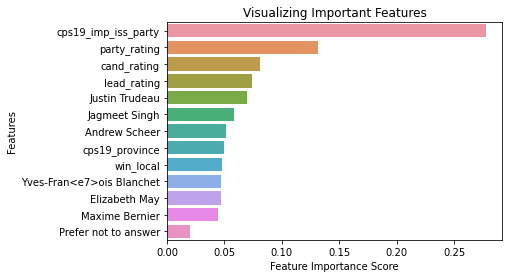

In [665]:
# Creating a seaborn bar plot
sb.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

In [666]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[   7    5    6    9    1    6    2    2]
 [   0  238   16    9    4   13    2   10]
 [   6    9 1739   59    5   51   15   19]
 [  10   20  115  332   40  158    4   89]
 [   2    8   23   34  290   89    2   48]
 [   1    9   35   62   32 1711    5   87]
 [   3    1   10    1    3    7   90    1]
 [   1    7   45   50   39   96    2  681]]


In [667]:

print(classification_report(y_test, y_pred))

                                  precision    recall  f1-score   support

  Another party (please specify)       0.23      0.18      0.21        38
            Bloc Qu<e9>b<e9>cois       0.80      0.82      0.81       292
              Conservative Party       0.87      0.91      0.89      1903
Don't know/ Prefer not to answer       0.60      0.43      0.50       768
                     Green Party       0.70      0.58      0.64       496
                   Liberal Party       0.80      0.88      0.84      1942
                  People's Party       0.74      0.78      0.76       116
                             ndp       0.73      0.74      0.73       921

                        accuracy                           0.79      6476
                       macro avg       0.68      0.67      0.67      6476
                    weighted avg       0.78      0.79      0.78      6476



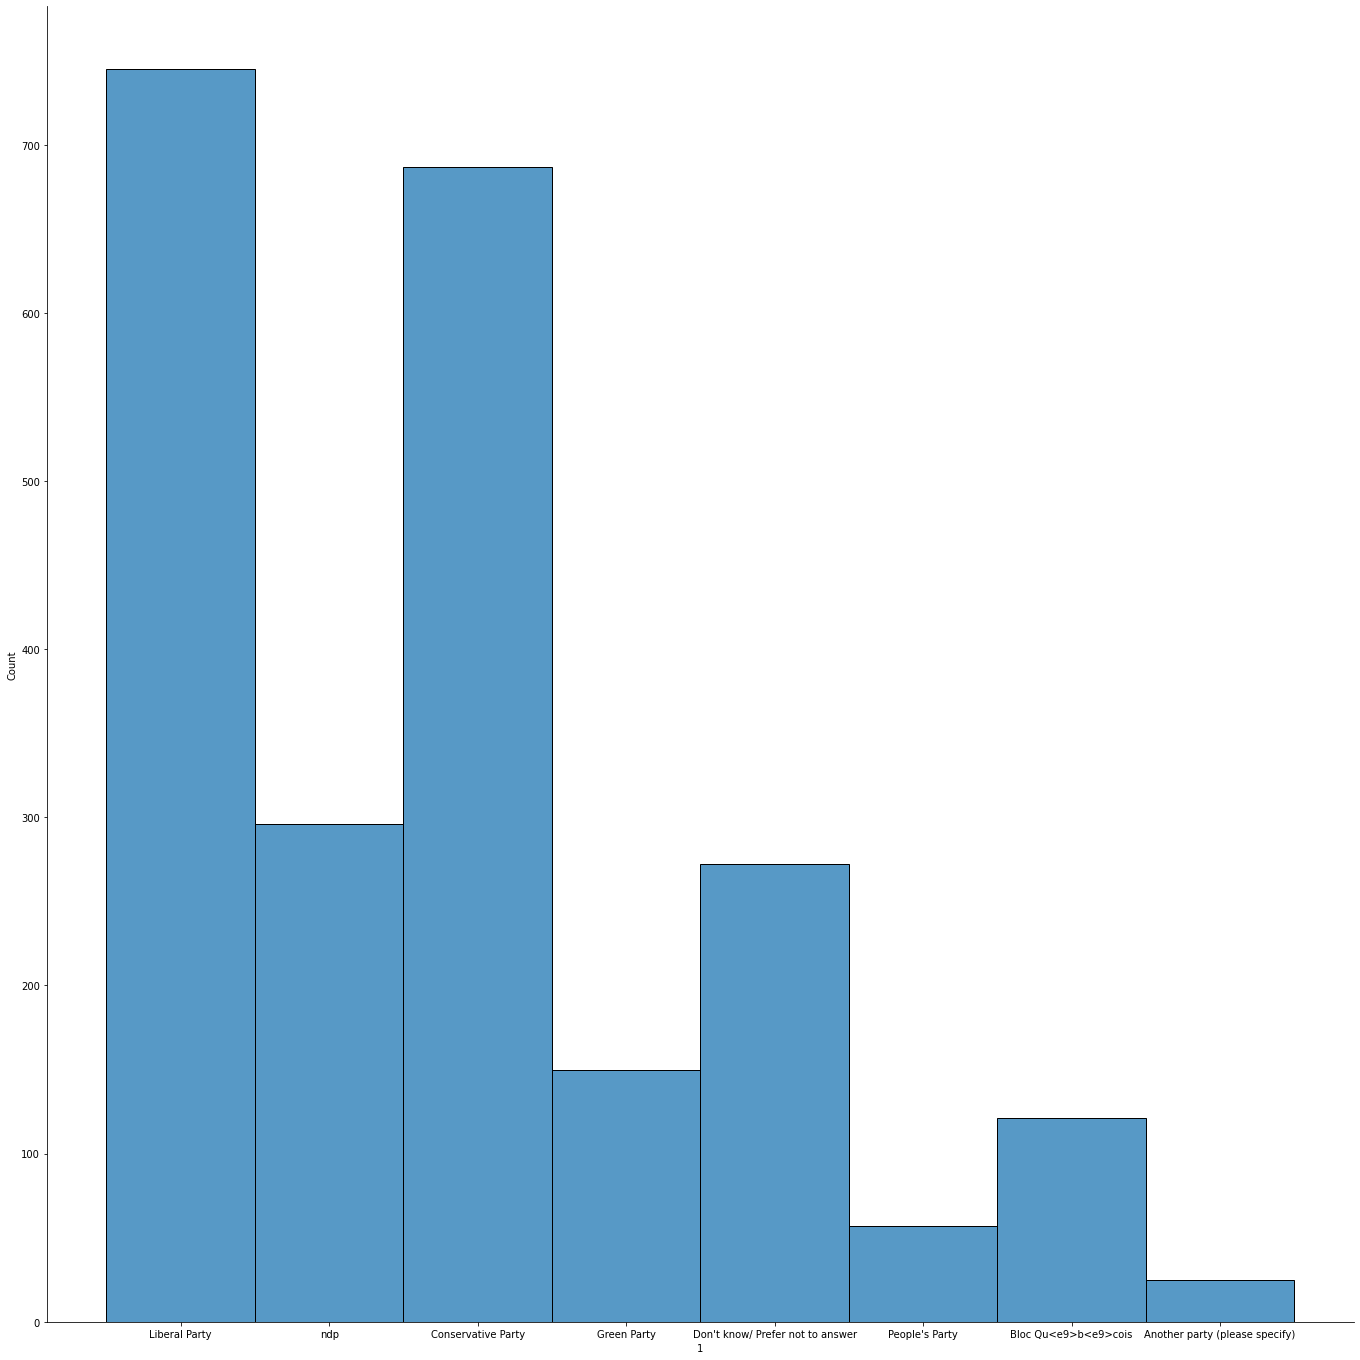

In [760]:
preds = rf.predict(data_test)
preds = pd.Series(preds)
index = pd.Series(data_test.index)
submit = pd.concat([index ,preds],axis=1)
sb.displot(submit[1],height=19)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


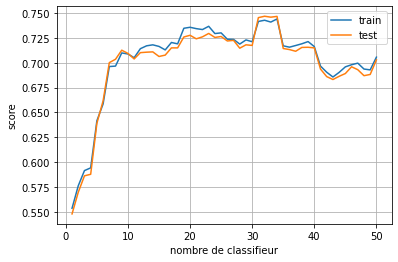

In [161]:
# *** TODO ***
# Entraînez un classifieur par ensemble de type AdaBoost sur le jeu de données (X_train, y_train)
# défini plus haut, en utilisant des souches de décision comme classifieur de base. 
# Rapportez les résultats et figures tel que demandé dans l'énoncé, sur
# les jeux d'entraînement et de test.
# Train an AdaBoost ensemble classifier on the dataset (X_train, y_train) defined above, using decision
# stumps as basic classifiers. Report the results and figures as asked in the statement, on the training
# and testing sets.
# ******
adaboost = AdaBoostClassifier(n_estimators=50, base_estimator=DecisionTreeClassifier(max_depth=1), random_state=42)
adaboost.fit(X_train, y_train)

train_score = []
for score in adaboost.staged_score(X_train, y_train):
    train_score.append(score)
    
test_score = []
for score in adaboost.staged_score(X_test, y_test):
    test_score.append(score)
    
# *** TODO ***
# Mesurez les performances en entraînement et en test
# en fonction du nombre de classifieurs.
# Measure performance in training and testing
# based on the number of classifiers.
# ******
plt.plot(range(1,51), train_score, label='train')
plt.plot(range(1,51), test_score, label='test')
plt.xlabel('nombre de classifieur')
plt.ylabel('score')
plt.grid()
plt.legend()

In [162]:
preds_adaboost = adaboost.predict(data_test)
submit_adaboost = pd.concat([index , pd.Series(preds_adaboost)],axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


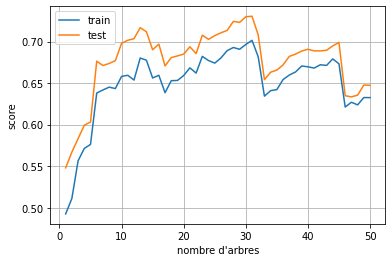

In [686]:
# *** TODO ***
# Entraînez un classifieur par ensemble de type AdaBoost sur le jeu de données (X_train, y_train)
# défini plus haut, en utilisant des souches de décision comme classifieur de base. 
# Rapportez les résultats et figures tel que demandé dans l'énoncé, sur
# les jeux d'entraînement et de test.
# Train an AdaBoost ensemble classifier on the dataset (X_train, y_train) defined above, using decision
# stumps as basic classifiers. Report the results and figures as asked in the statement, on the training
# and testing sets.
# ******
adaboost = AdaBoostClassifier(n_estimators=50, base_estimator=DecisionTreeClassifier(max_depth=1), random_state=42)
adaboost.fit(X_train_o, y_train_o)

train_score = []
for score in adaboost.staged_score(X_train_o, y_train_o):
    train_score.append(score)
    
test_score = []
for score in adaboost.staged_score(X_test, y_test):
    test_score.append(score)
    
# *** TODO ***
# Mesurez les performances en entraînement et en test
# en fonction du nombre de classifieurs.
# Measure performance in training and testing
# based on the number of classifiers.
# ******
plt.plot(range(1,51), train_score, label='train')
plt.plot(range(1,51), test_score, label='test')
plt.xlabel('nombre d\'arbres')
plt.ylabel('score')
plt.grid()
plt.legend()

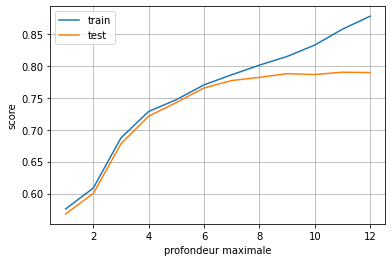

In [786]:
# *** TODO ***
# Entraînez un classifieur par ensemble de type Random Forest sur le jeu de données
# ******
plot_dmax = range(1,13)
plot_count = 0

train_score =[]
test_score = []

for dmax in range(1, 13):
    randomforest = RandomForestClassifier(n_estimators=50, max_depth=dmax, random_state=0)
    randomforest.fit(X_train, y_train)
    scoreTrain = randomforest.score(X_train, y_train)
    scoreTest = randomforest.score(X_test, y_test)
    train_score.append(scoreTrain)
    test_score.append(scoreTest)

# *** TODO ***
# Produisez une figure montrant la performance en entraînement et test en fonction de la profondeur maximale utilisée.
# Produce a figure showing training and test performance as a function of maximum depth used.
# ******
plt.plot(range(1,13), train_score, label='train')
plt.plot(range(1,13), test_score, label='test')
plt.xlabel('profondeur maximale')
plt.ylabel('score')
plt.grid()
plt.legend()

In [787]:
#base_classifier = DecisionTreeClassifier(max_depth=adaBoost_Optimal_Hyperparams[0])


dict_classifiers = {
    "OnevsRestClassifier":OneVsRestClassifier(SVC(kernel='poly')),
    "Random Forrest": RandomForestClassifier(n_estimators=50, max_depth=10),
    "Adaboost": AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4), n_estimators=44, learning_rate=0.1),
}

def batch_classify(X_train, Y_train, X_test, Y_test, no_classifiers = 5, verbose = True):  
    dict_models = {}
    for classifier_name, classifier in list(dict_classifiers.items())[:no_classifiers]:
        t_start = time.clock()
        classifier.fit(X_train, Y_train)
        t_end = time.clock()
        
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        test_score = classifier.score(X_test, Y_test)
        
        dict_models[classifier_name] = {'model': classifier, 'train_score': train_score, 'test_score': test_score, 'train_time': t_diff}
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=classifier_name, f=t_diff))
    return dict_models

def display_dict_models(dict_models, sort_by='test_score'):
    cls = [key for key in dict_models.keys()]
    test_s = [dict_models[key]['test_score'] for key in cls]
    training_s = [dict_models[key]['train_score'] for key in cls]
    training_t = [dict_models[key]['train_time'] for key in cls]

    df_ = pd.DataFrame(data=np.zeros(shape=(len(cls),4)), columns = ['classifier', 'train_score', 'test_score', 'train_time'])
    for ii in range(0,len(cls)):
        df_.loc[ii, 'classifier'] = cls[ii]
        df_.loc[ii, 'train_score'] = training_s[ii]
        df_.loc[ii, 'test_score'] = test_s[ii]
        df_.loc[ii, 'train_time'] = training_t[ii]
    
    display(df_.sort_values(by=sort_by, ascending=False))

In [788]:
models = batch_classify(X_train_o, y_train_o, X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


trained OnevsRestClassifier in 39.15 s


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


trained Random Forrest in 0.42 s


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


trained Adaboost in 2.43 s


In [789]:
display_dict_models(models)

,classifier,train_score,test_score,train_time
1,Random Forrest,0.830265,0.785361,0.417754
2,Adaboost,0.761505,0.770383,2.427978
0,OnevsRestClassifier,0.732742,0.720970,39.153892


<AxesSubplot:xlabel='model_name', ylabel='accuracy'>

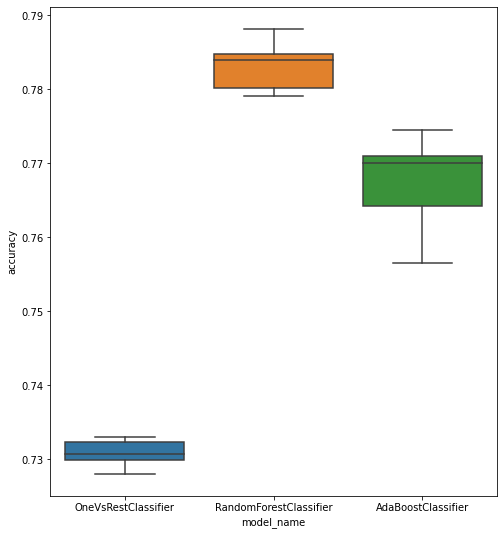

In [793]:


models = [
    OneVsRestClassifier(SVC(kernel= 'poly')),
    RandomForestClassifier(n_estimators=50, max_depth=10, random_state=0),
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4), n_estimators=44, learning_rate=0.1, random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

fig, ax = plt.subplots(figsize=(8, 9))
sb.boxplot(ax = ax, x='model_name', y='accuracy', data=cv_df)

In [674]:
model = OneVsOneClassifier(SVC(kernel='poly'))
   
# Fitting the model with training data
model.fit(X_train_o, y_train_o)
   
# Making a prediction on the test set
prediction = model.predict(X_test)
   
# Evaluating the model
print(f"Test Set Accuracy : {accuracy_score(y_test, prediction) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report(y_test, prediction)}")

Test Set Accuracy : 73.30142063001853 %


Classification Report : 

                                  precision    recall  f1-score   support

  Another party (please specify)       0.10      0.21      0.13        38
            Bloc Qu<e9>b<e9>cois       0.77      0.72      0.74       292
              Conservative Party       0.84      0.91      0.87      1903
Don't know/ Prefer not to answer       0.51      0.36      0.42       768
                     Green Party       0.68      0.42      0.52       496
                   Liberal Party       0.76      0.85      0.81      1942
                  People's Party       0.43      0.60      0.50       116
                             ndp       0.67      0.63      0.65       921

                        accuracy                           0.73      6476
                       macro avg       0.60      0.59      0.58      6476
                    weighted avg       0.73      0.73      0.72      6476



In [688]:
from sklearn.model_selection import GridSearchCV

params = {
     'n_estimators': np.arange(10,51),
     'learning_rate': [0.01, 0.05, 0.1, 1],
 }
grid_cv = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)), param_grid= params, cv=5, n_jobs=-1)
grid_cv.fit(X_train_o, y_train_o)
grid_cv.best_params_

{'learning_rate': 0.1, 'n_estimators': 44}

In [701]:
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4), n_estimators=44, learning_rate=0.1)

# Fitting the model with training data
model.fit(X_train_o, y_train_o)
   
# Making a prediction on the test set
prediction = model.predict(X_test)
   
# Evaluating the model
print(f"Test Set Accuracy : {accuracy_score(y_test, prediction) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report(y_test, prediction)}")

Test Set Accuracy : 77.03829524397776 %


Classification Report : 

                                  precision    recall  f1-score   support

  Another party (please specify)       0.20      0.26      0.23        38
            Bloc Qu<e9>b<e9>cois       0.86      0.76      0.81       292
              Conservative Party       0.91      0.86      0.89      1903
Don't know/ Prefer not to answer       0.48      0.58      0.53       768
                     Green Party       0.70      0.52      0.60       496
                   Liberal Party       0.82      0.85      0.83      1942
                  People's Party       0.80      0.72      0.75       116
                             ndp       0.71      0.73      0.72       921

                        accuracy                           0.77      6476
                       macro avg       0.69      0.66      0.67      6476
                    weighted avg       0.78      0.77      0.77      6476



In [290]:
X_t = X_train_o.drop(['Justin Trudeau', 'Andrew Scheer', 'Jagmeet Singh', 'Yves-Fran<e7>ois Blanchet',
                      'Elizabeth May', 'Maxime Bernier', 'Prefer not to answer', 'None of these'], axis=1)

In [291]:
X_te = X_test.drop(['Justin Trudeau', 'Andrew Scheer', 'Jagmeet Singh', 'Yves-Fran<e7>ois Blanchet',
                      'Elizabeth May', 'Maxime Bernier', 'Prefer not to answer', 'None of these'], axis=1)

In [295]:

xgb = XGBClassifier(eta = 0.01, max_depth=2)
xgb.fit(X_t, y_train_o)
prediction = xgb.predict(X_te)
# Evaluating the model
print(f"Test Set Accuracy : {accuracy_score(y_test, prediction) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report(y_test, prediction)}")
cm = confusion_matrix(y_test, prediction)
print('Confusion matrix\n\n', cm)

Test Set Accuracy : 78.45892526250772 %


Classification Report : 

                                  precision    recall  f1-score   support

  Another party (please specify)       0.22      0.47      0.30        38
            Bloc Qu<e9>b<e9>cois       0.87      0.79      0.83       292
              Conservative Party       0.89      0.90      0.90      1903
Don't know/ Prefer not to answer       0.64      0.46      0.53       768
                     Green Party       0.63      0.58      0.60       496
                   Liberal Party       0.81      0.86      0.83      1942
                  People's Party       0.74      0.84      0.79       116
                             ndp       0.72      0.75      0.73       921

                        accuracy                           0.78      6476
                       macro avg       0.69      0.71      0.69      6476
                    weighted avg       0.78      0.78      0.78      6476

Confusion matrix

 [[  18    1    4    6 

In [94]:
model = RandomForestClassifier(n_estimators=50, max_depth=20, random_state=0)
model.fit(X_train_o, y_train_o)
prediction = model.predict(X_test)
# Evaluating the model
print(f"Test Set Accuracy : {accuracy_score(y_test, prediction) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report(y_test, prediction)}")
cm = confusion_matrix(y_test, prediction)
print('Confusion matrix\n\n', cm)

Test Set Accuracy : 77.84126003705991 %


Classification Report : 

                                  precision    recall  f1-score   support

  Another party (please specify)       0.19      0.13      0.16        38
            Bloc Qu<e9>b<e9>cois       0.78      0.79      0.79       292
              Conservative Party       0.87      0.91      0.89      1903
Don't know/ Prefer not to answer       0.55      0.44      0.49       768
                     Green Party       0.68      0.58      0.63       496
                   Liberal Party       0.81      0.87      0.84      1942
                  People's Party       0.73      0.72      0.72       116
                             ndp       0.72      0.73      0.73       921

                        accuracy                           0.78      6476
                       macro avg       0.67      0.65      0.65      6476
                    weighted avg       0.77      0.78      0.77      6476

Confusion matrix

 [[   5    4    8    7 

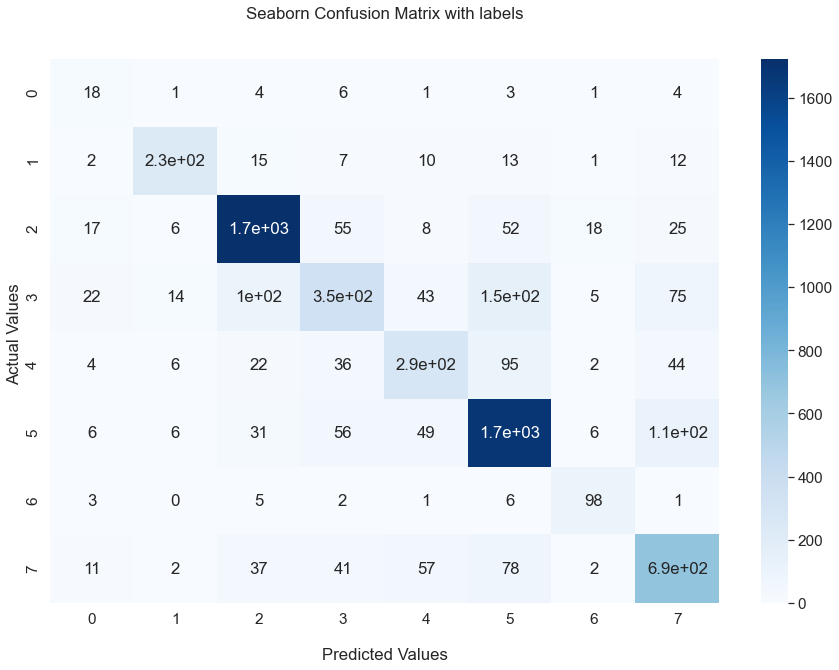

In [330]:
from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(model, X_test, y_test)
plt.figure(figsize=(15,10))

ax = sb.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


<Figure size 1080x1080 with 0 Axes>

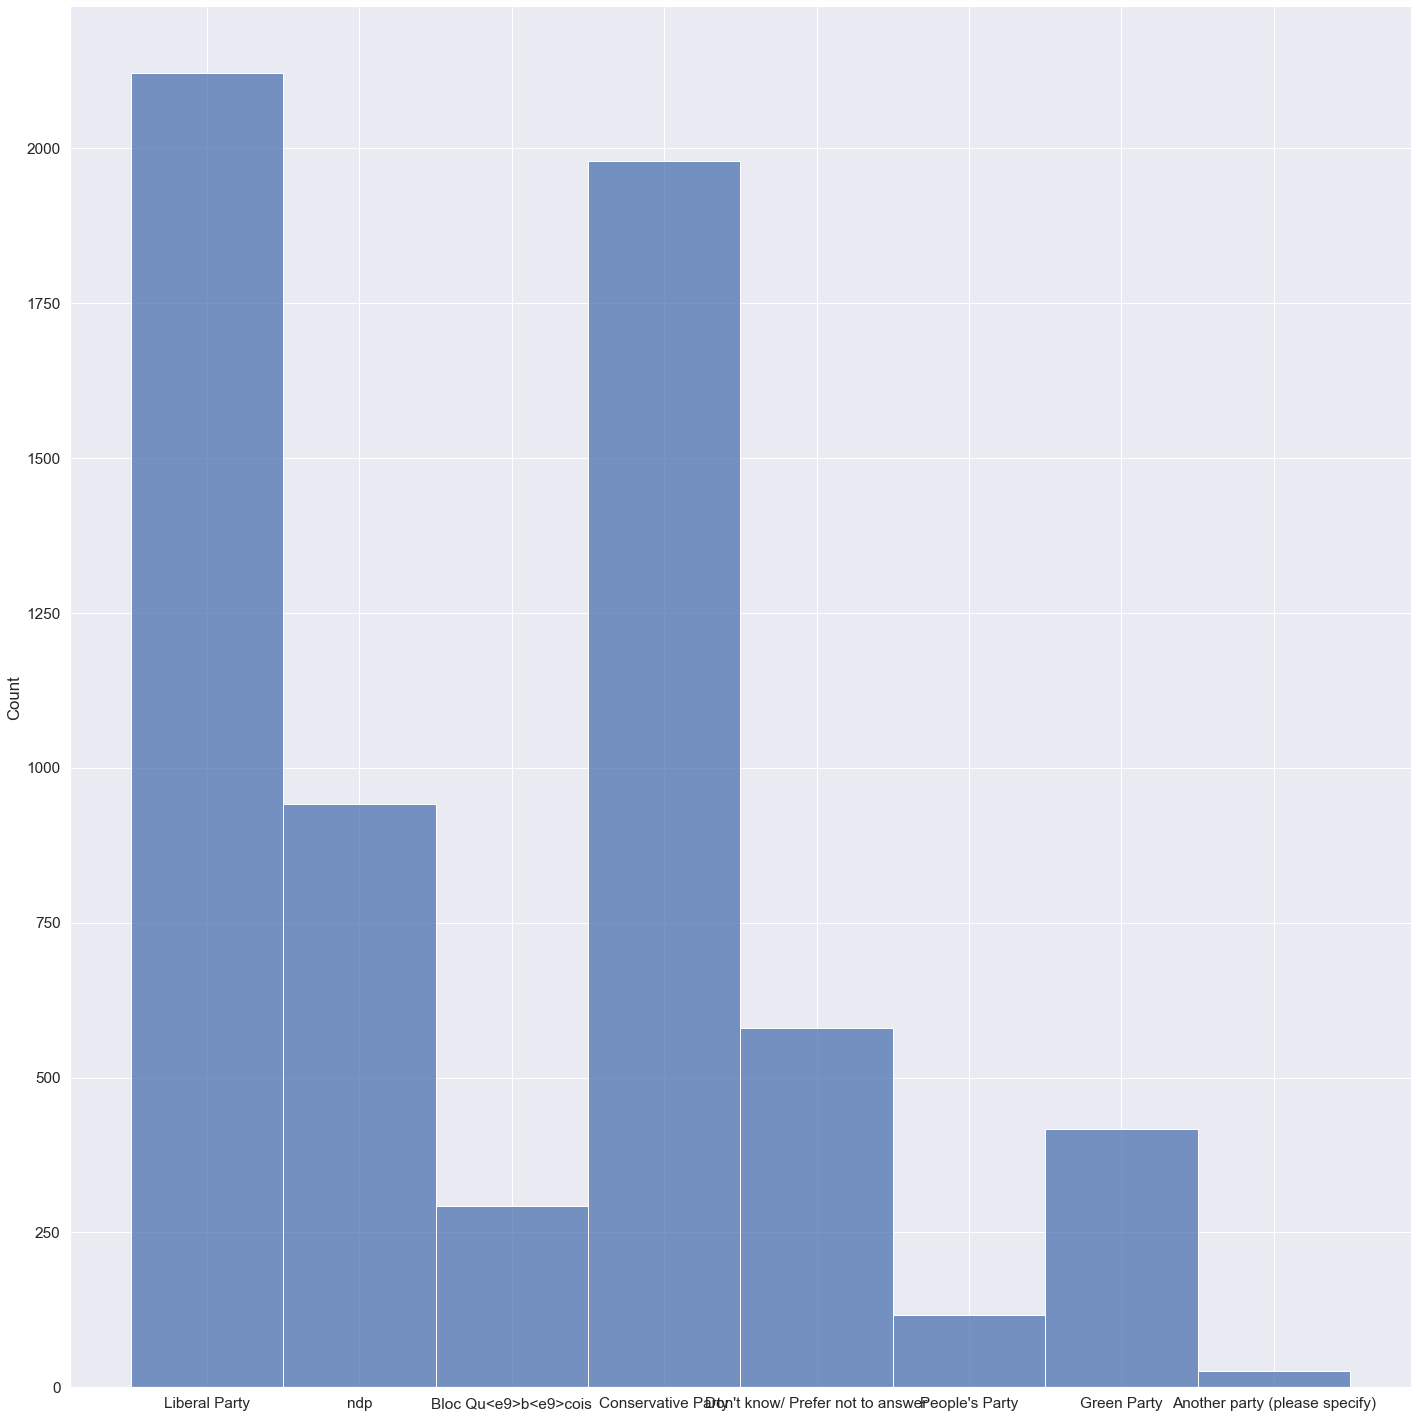

In [122]:
plt.figure(figsize=(15,15))
sb.displot(prediction,height=20)

Text(0.5, 1.0, 'Visualizing Important Features')

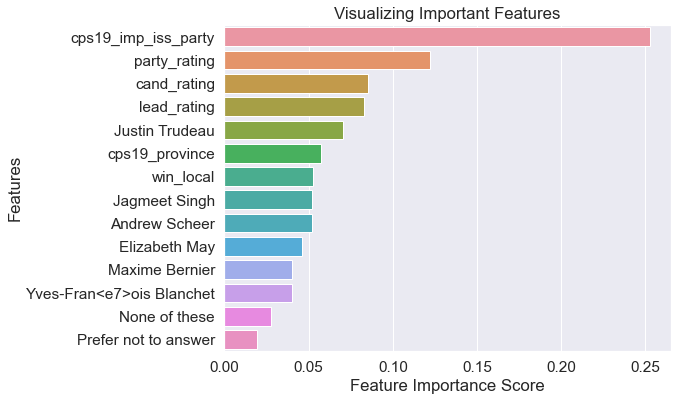

In [467]:
# view the feature scores
feature_scores = pd.Series(model.feature_importances_, index=X_train_o.columns).sort_values(ascending=False)
# Creating a seaborn bar plot

ax = plt.figure(figsize=(8,6)) 
ax = sb.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

In [ ]:
data_train[data_train['Justin Trudeau'] >= 3]['cps19_votechoice'].value_counts().sum()

In [338]:
data_train['cps19_']

cps19_imp_iss_party          0.252446
party_rating                 0.122084
cand_rating                  0.084997
lead_rating                  0.082969
Justin Trudeau               0.070531
cps19_province               0.057323
win_local                    0.052545
Jagmeet Singh                0.052219
Andrew Scheer                0.051800
Elizabeth May                0.045990
Maxime Bernier               0.040196
Yves-Fran<e7>ois Blanchet    0.039951
None of these                0.027665
Prefer not to answer         0.019284
dtype: float64

In [497]:
preds = model.predict(data_test)
preds = pd.Series(preds)
index = pd.Series(data_test.index)
submit = pd.concat([index ,preds],axis=1)
submit.to_csv('submission.csv', index=False, header=False)
#sb.displot(submit[1],height=24)

In [498]:
submitdf = pd.read_csv('submission.csv', sep=',')
submitdf

,22,Liberal Party
0,45,Liberal Party
1,59,Liberal Party
2,63,ndp
3,91,Liberal Party
4,93,Conservative Party
...,...,...
2347,37786,ndp
2348,37791,Conservative Party
2349,37792,People's Party
2350,37797,Liberal Party


In [ ]:
submit.to_csv('pandas.txt', header=None, index=None, sep='\t', mode='a')

In [98]:
d = prediction == y_test

In [100]:
dr = pd.DataFrame(d)

In [136]:
#Bons Cas
preds = pd.Series(prediction)
index = pd.Series(data_test.index)
submit = pd.concat([index ,preds],axis=1)

In [154]:
X[X.index == 9650]

,cps19_province,cps19_imp_iss_party,Justin Trudeau,Andrew Scheer,party_rating,lead_rating,win_local,cand_rating,Jagmeet Singh,Yves-Fran<e7>ois Blanchet,Elizabeth May,Maxime Bernier,None of these,Prefer not to answer
9650,Quebec,Bloc Qu<e9>b<e9>cois,0,0,Bloc Qu<e9>b<e9>cois,Yves-François Blanchet,Liberal Party,Liberal candidate,2,4,0,0,0,0


In [155]:
y[y.index == 9650]

9650    Bloc Qu<e9>b<e9>cois
Name: cps19_votechoice, dtype: object

In [140]:
X[X.index == 30075]

,cps19_province,cps19_imp_iss_party,Justin Trudeau,Andrew Scheer,party_rating,lead_rating,win_local,cand_rating,Jagmeet Singh,Yves-Fran<e7>ois Blanchet,Elizabeth May,Maxime Bernier,None of these,Prefer not to answer
30075,Quebec,Liberal Party,3,0,Liberal Party,Justin Trudeau,Another party (please specify),Liberal candidate,4,1,2,0,0,0


In [142]:
y[y.index == 30075]

30075    Liberal Party
Name: cps19_votechoice, dtype: object

In [143]:
X[X.index == 24056]

,cps19_province,cps19_imp_iss_party,Justin Trudeau,Andrew Scheer,party_rating,lead_rating,win_local,cand_rating,Jagmeet Singh,Yves-Fran<e7>ois Blanchet,Elizabeth May,Maxime Bernier,None of these,Prefer not to answer
24056,Ontario,Green Party,0,2,Conservative Party,Andrew Scheer,Conservative Party,Conservative candidate,2,0,4,0,0,0


In [144]:
y[y.index == 24056]

24056    Conservative Party
Name: cps19_votechoice, dtype: object

In [147]:
X[X.index == 16073]

,cps19_province,cps19_imp_iss_party,Justin Trudeau,Andrew Scheer,party_rating,lead_rating,win_local,cand_rating,Jagmeet Singh,Yves-Fran<e7>ois Blanchet,Elizabeth May,Maxime Bernier,None of these,Prefer not to answer
16073,Ontario,Conservative Party,0,3,Conservative Party,Andrew Scheer,ndp,Conservative candidate,3,1,1,1,0,1


In [148]:
y[y.index == 16073]

16073    Conservative Party
Name: cps19_votechoice, dtype: object

In [149]:
X[X.index == 21264]

,cps19_province,cps19_imp_iss_party,Justin Trudeau,Andrew Scheer,party_rating,lead_rating,win_local,cand_rating,Jagmeet Singh,Yves-Fran<e7>ois Blanchet,Elizabeth May,Maxime Bernier,None of these,Prefer not to answer
21264,Ontario,Conservative Party,0,4,Conservative Party,Andrew Scheer,Conservative Party,Conservative candidate,0,0,0,0,0,0


In [150]:
y[y.index == 21264]

21264    Conservative Party
Name: cps19_votechoice, dtype: object

In [162]:
# mauvais cas
X[X.index == 20641]

,cps19_province,cps19_imp_iss_party,Justin Trudeau,Andrew Scheer,party_rating,lead_rating,win_local,cand_rating,Jagmeet Singh,Yves-Fran<e7>ois Blanchet,Elizabeth May,Maxime Bernier,None of these,Prefer not to answer
20641,Ontario,Don't know/ Prefer not to answer,0,0,Conservative Party,Another candidate (please specify),Conservative Party,Liberal candidate,0,0,0,0,1,3


In [167]:
model.predict(X_test[X_test.index == 20641])

array(['Conservative Party'], dtype=object)

In [159]:
y[y.index == 20641]

20641    ndp
Name: cps19_votechoice, dtype: object

In [141]:
X[X.index == 36189]

,cps19_province,cps19_imp_iss_party,Justin Trudeau,Andrew Scheer,party_rating,lead_rating,win_local,cand_rating,Jagmeet Singh,Yves-Fran<e7>ois Blanchet,Elizabeth May,Maxime Bernier,None of these,Prefer not to answer
36189,Quebec,Green Party,0,0,ndp,Jagmeet Singh,Bloc Qu<e9>b<e9>cois,Another party (please specify),3,3,1,0,0,0


In [128]:
y[y.index == 36189]

36189    Don't know/ Prefer not to answer
Name: cps19_votechoice, dtype: object

In [129]:
X[X.index == 29088]

,cps19_province,cps19_imp_iss_party,Justin Trudeau,Andrew Scheer,party_rating,lead_rating,win_local,cand_rating,Jagmeet Singh,Yves-Fran<e7>ois Blanchet,Elizabeth May,Maxime Bernier,None of these,Prefer not to answer
29088,British Columbia,Don't know/ Prefer not to answer,0,0,Another party (please specify),Another candidate (please specify),Liberal Party,Liberal candidate,0,0,0,0,3,1


In [130]:
y[y.index == 29088]

29088    Liberal Party
Name: cps19_votechoice, dtype: object